# Valores missing, outliers y correlación

En este notebook continuamos con el preprocesamiento y análisis exploratorio del dataset procesado previamente. Nos enfocamos en profundizar en las relaciones entre variables y en la preparación de datos para modelos predictivos. Nos enfocaremos en el análisis de distribuciones, correlaciones y segmentaciones, además de explorar posibles valores atípicos y relaciones clave entre las variables y el objetivo (*TARGET*).

Vamos a seguir los siguientes pasos:
- Cambio de tipos de variables
- Separación en train y test
- Visualización descriptiva de los datos
- Tratamiento de las variables continuas: correlaciones de pearson, estudio de outliers y estudio de valores missing
- Tratamiento de las variables categoricas:  estudio de correlaciones con vCramer, relleno de valores missing

### Librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
import scipy.stats as stats
from scipy.stats import chi2_contingency
import warnings
import sys

## Funciones

In [2]:
sys.path.append('../src/')
import functions as f
sys.path.remove('../src/')

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.width', 10000)

In [3]:
#Constantes
seed= 12345

### Carga de los datos

In [4]:
# Carga de los datos
pd_data = pd.read_csv("../data/df_data_1.csv").set_index('SK_ID_CURR')
pd_data.head()

COMMONAREA_AVG  NONLIVINGAPARTMENTS_AVG FONDKAPREMONT_MODE  LIVINGAPARTMENTS_AVG  FLOORSMIN_AVG  YEARS_BUILD_AVG  OWN_CAR_AGE  LANDAREA_AVG  BASEMENTAREA_AVG  EXT_SOURCE_1  NONLIVINGAREA_AVG  ELEVATORS_AVG WALLSMATERIAL_MODE  APARTMENTS_AVG  ENTRANCES_AVG  LIVINGAREA_AVG  HOUSETYPE_MODE  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_AVG  TOTALAREA_MODE EMERGENCYSTATE_MODE OCCUPATION_TYPE  EXT_SOURCE_3       ORGANIZATION_TYPE  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR NAME_TYPE_SUITE  DEF_60_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE  EXT_SOURCE_2  AMT_GOODS_PRICE  AMT_ANNUITY CODE_GENDER  CNT_FAM_MEMBERS  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_10  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  REGION_RATING_CLIENT_W_CITY  FLAG_DOCUMENT_11  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_INCOME_TOTAL  CNT_CHILDREN FLAG_OWN_REALTY FLAG_OWN_CAR  FLAG_DOCUMENT_12  AMT_CREDIT  WEEKDAY_APPR_PROCESS_START NAME_INCOME_TYPE  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  REGION_RATING_CLIENT  FLAG_EMAIL  FLAG_PHONE  FLAG_CONT_MOBILE  FLAG_WORK_PHONE NAME_CONTRACT_TYPE  FLAG_EMP_PHONE  FLAG_MOBIL  DAYS_ID_PUBLISH  DAYS_REGISTRATION  DAYS_EMPLOYED  DAYS_BIRTH  REGION_POPULATION_RELATIVE  NAME_HOUSING_TYPE    NAME_FAMILY_STATUS            NAME_EDUCATION_TYPE  TARGET
SK_ID_CURR                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
100002              0.0143                   0.0000   reg oper account                0.0202         0.1250           0.6192          NaN        0.0369            0.0369      0.083037             0.0000           0.00       Stone, brick          0.0247         0.0690          0.0190  block of flats         0.0833                       0.9722          0.0149                  No        Laborers      0.139376  Busines

In [5]:
pd_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 307511 entries, 100002 to 456255
Data columns (total 93 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   COMMONAREA_AVG               92646 non-null   float64
 1   NONLIVINGAPARTMENTS_AVG      93997 non-null   float64
 2   FONDKAPREMONT_MODE           97216 non-null   object 
 3   LIVINGAPARTMENTS_AVG         97312 non-null   float64
 4   FLOORSMIN_AVG                98869 non-null   float64
 5   YEARS_BUILD_AVG              103023 non-null  float64
 6   OWN_CAR_AGE                  104582 non-null  float64
 7   LANDAREA_AVG                 124921 non-null  float64
 8   BASEMENTAREA_AVG             127568 non-null  float64
 9   EXT_SOURCE_1                 134133 non-null  float64
 10  NONLIVINGAREA_AVG            137829 non-null  float64
 11  ELEVATORS_AVG                143620 non-null  float64
 12  WALLSMATERIAL_MODE           151170 non-null  object 
 13 

Tras procesar los datos en el notebook anterior, contamos con un dataset depurado que ha sido limpiado de columnas redundantes.
El dataset cuenta ahora con 93 columnas y 307,511 filas, como se puede observar al realizar un análisis inicial. Este análisis preliminar confirma que el formato del dataset es adecuado para continuar con la exploración y transformación.

## Cambio de tipo a variables categóricas

Muchas de las columnas tienen naturaleza categórica, pero están almacenadas como objetos (object). Para optimizar su manejo, transformamos estas columnas a categoricas, lo que mejora el rendimiento del análisis, reduce el uso de memoria y facilita operaciones estadísticas.

In [6]:
pd_data[['CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']]=pd_data[['CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']].astype('category')

In [7]:
pd_data[['FONDKAPREMONT_MODE', 'NAME_CONTRACT_TYPE']].astype('category')  

FONDKAPREMONT_MODE NAME_CONTRACT_TYPE
SK_ID_CURR                                      
100002       reg oper account         Cash loans
100003       reg oper account         Cash loans
100004                    NaN    Revolving loans
100006                    NaN         Cash loans
100007                    NaN         Cash loans
...                       ...                ...
456251       reg oper account         Cash loans
456252       reg oper account         Cash loans
456253       reg oper account         Cash loans
456254                    NaN         Cash loans
456255                    NaN         Cash loans

[307511 rows x 2 columns]

Por ejemplo, la columna *NAME_CONTRACT_TYPE* contiene categorías como *Cash loans* y *Revolving loans*, que serán útiles para analizar patrones de comportamiento financiero. Mientras tanto, *FONDKAPREMONT_MODE* incluye datos categóricos relevantes como *reg oper account*, que también puede ser interpretado en análisis posteriores.

Para comenzar con el análisis de las variables, clasificamos las columnas del dataset según su tipo: booleanas, categóricas y numéricas. Este paso es fundamental para decidir los métodos de análisis y preprocesamiento que aplicaremos a cada tipo de variable.

In [8]:
pd_data_bool, pd_data_cat, pd_data_num = f.tipos_vars(pd_data, False)

En el conjunto de datos, algunas variables clasificadas inicialmente como categóricas contienen valores que en realidad corresponden a datos numéricos. Estas variables necesitan ser trasladadas al grupo de variables numéricas para garantizar su tratamiento adecuado en etapas posteriores.

In [9]:
variables_to_move = [
    'CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_YEAR',
    'HOUR_APPR_PROCESS_START'
]

Eliminamos las variables identificadas como numéricas del grupo categórico y las añadimos al grupo de variables numéricas. Este proceso asegura que las columnas se utilicen de manera coherente con su naturaleza.

In [10]:
pd_data_cat = [var for var in pd_data_cat if var not in variables_to_move]
pd_data_num.extend([var for var in variables_to_move if var in pd_data.columns])

Tras este ajuste, confirmamos que las variables han sido correctamente reclasificadas. Esto permite evitar errores durante el análisis exploratorio y el modelado posterior.

Para garantizar cálculos precisos y evitar errores de tipo, convertimos todas las variables numéricas al tipo de dato *float*.

In [11]:
pd_data[pd_data_num] = pd_data[pd_data_num].astype(float)

Este cambio estandariza las variables numéricas, permitiendo la aplicación uniforme de operaciones estadísticas y matemáticas.

Las variables booleanas *FLAG_OWN_CAR*, *FLAG_OWN_REALTY* y *EMERGENCYSTATE_MODE*, contienen valores de texto ("Yes/No", "Y/N"). Para simplificar su análisis y modelado, convertimos estas variables a formato binario (1 para 'YES/Y' y 0 para 'NO/N').

In [12]:
pd_data['FLAG_OWN_CAR'] = pd_data['FLAG_OWN_CAR'].apply(lambda x: 1 if x == 'Y' else 0)
pd_data['FLAG_OWN_REALTY'] = pd_data['FLAG_OWN_REALTY'].apply(lambda x: 1 if x == 'Y' else 0)
pd_data['EMERGENCYSTATE_MODE'] = pd_data['EMERGENCYSTATE_MODE'].apply(lambda x: 1 if x == 'Yes' else 0)

Además, cuando al final del notebook anterior (01), sustituimos los valores *XNA* por missing en la variable *CODE_GENDER*, se convirtió también en una variable booleana, por lo que vamos a asignar ceros al valor *M* (hombre) y unos al valor *F* (mujer).

In [13]:
pd_data['CODE_GENDER'] = pd_data['CODE_GENDER'].apply(lambda x: 1 if x == 'F' else 0)

Por otro lado, la variable *NAME_CONTRACT_TYPE*, que habíamos clasificado originalmente como booleana, la vamos a considerar como categórica, ya que sus posibles valores son los strings *Cash loans* y *Revolving Loans*.

In [14]:
pd_data_cat.append('NAME_CONTRACT_TYPE')

pd_data_bool.remove('NAME_CONTRACT_TYPE')

## Separación en Train y Test estratificado

Antes de realizar la separación en conjuntos de *Train* y *Test*, es importante conocer la distribución de la variable objetivo (*TARGET*). Esto nos permitirá garantizar que se mantenga una proporción similar entre ambas clases en los dos subconjuntos.

In [15]:
data_target = pd_data['TARGET']\
    .value_counts(normalize=True)\
    .mul(100).rename('percent').reset_index()

data_target_conteo=pd_data['TARGET'].value_counts()
data_plot_target = pd.merge(data_target, data_target_conteo, on='TARGET')
data_plot_target

TARGET    percent   count
0       0  91.927118  282686
1       1   8.072882   24825

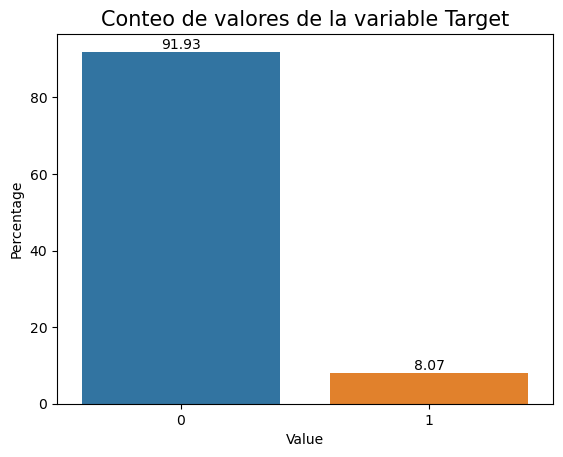

In [16]:
fig, ax = plt.subplots()
sns.barplot(data=data_plot_target, x='TARGET', y='percent', ax=ax, hue='TARGET', legend=False)
ax.set_title('Conteo de valores de la variable Target', fontdict={'fontsize':15}) #,'fontname':'Montserrat','weight':'bold'
ax.set_ylabel('Percentage')
ax.set_xlabel('Value')
for i in ax.containers:
    ax.bar_label(i,fmt='{:,.2f}')
plt.show()

Este gráfico de barras muestra la proporción de cada clase (0 y 1). Observamos que la clase 0 es dominante (91.93%) frente a la clase 1 (8.07%). Este desbalance puede influir en el rendimiento de los modelos y debe tenerse en cuenta a la hora de separar los datos.

Para evaluar correctamente el rendimiento de los modelos, dividimos los datos en dos conjuntos:

**Train**: Para entrenar el modelo.

**Test**: Para validar el rendimiento en datos no vistos. En este caso, utilizamos una separación estratificada para mantener la misma proporción de las clases (0 y 1) en ambos conjuntos

In [17]:
from sklearn.model_selection import train_test_split
X_data_train, X_data_test, y_data_train, y_data_test = train_test_split(pd_data.drop('TARGET',axis=1)
                                                                         ,pd_data['TARGET']
                                                                         ,stratify=pd_data['TARGET']
                                                                         ,test_size=0.2
                                                                         ,random_state=seed)
pd_data_train = pd.concat([X_data_train, y_data_train],axis=1)
pd_data_test = pd.concat([X_data_test, y_data_test],axis=1)

**train_test_split** divide los datos en proporción 80% (entrenamiento) y 20% (prueba).
La opción stratify asegura que la proporción de las clases en *TARGET* sea consistente con la distribución que tiene en el dataset.

In [18]:
print('== Train\n', pd_data_train['TARGET'].value_counts(normalize=True))
print('== Test\n', pd_data_test['TARGET'].value_counts(normalize=True))

== Train
 TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64
== Test
 TARGET
0    0.919272
1    0.080728
Name: proportion, dtype: float64


## Visualización descriptiva de los datos

### Distribución del resto de variables

Hacemos gráficas de la distribución de cada variable, y de su distribución condicionada al valor de *'TARGET'*, para ver si podemos extraer algunas conclusiones provisionales sobre qué variables son más importantes. Para ello hemos creado una función que permite graficar las variables de forma adecuada a su estructura.

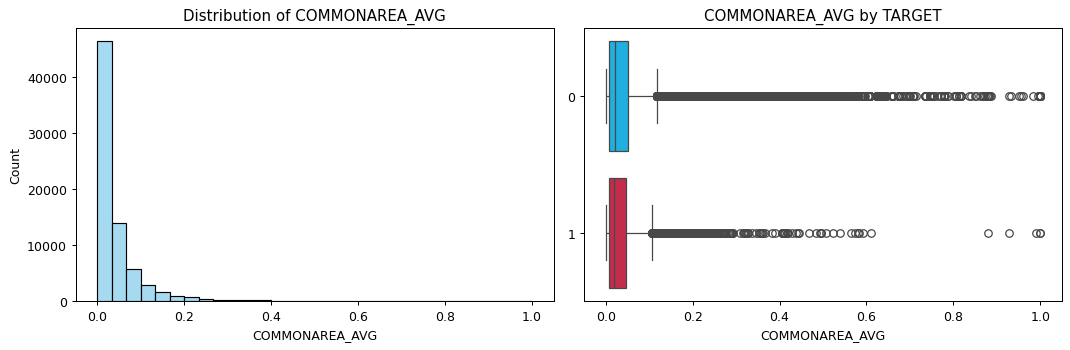

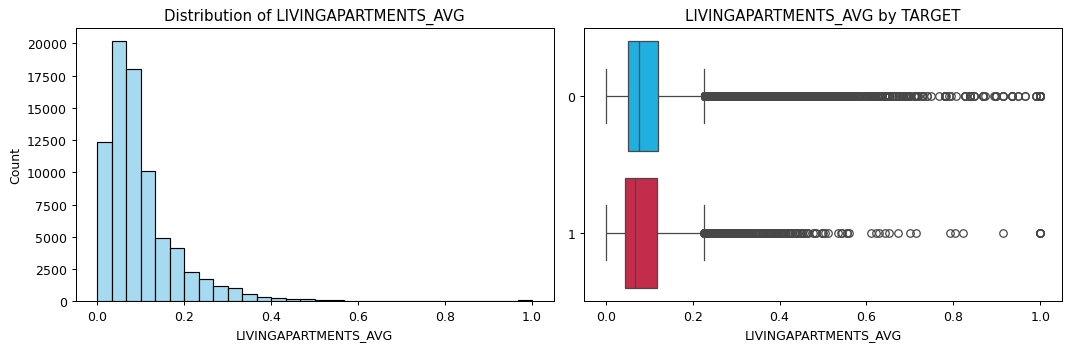

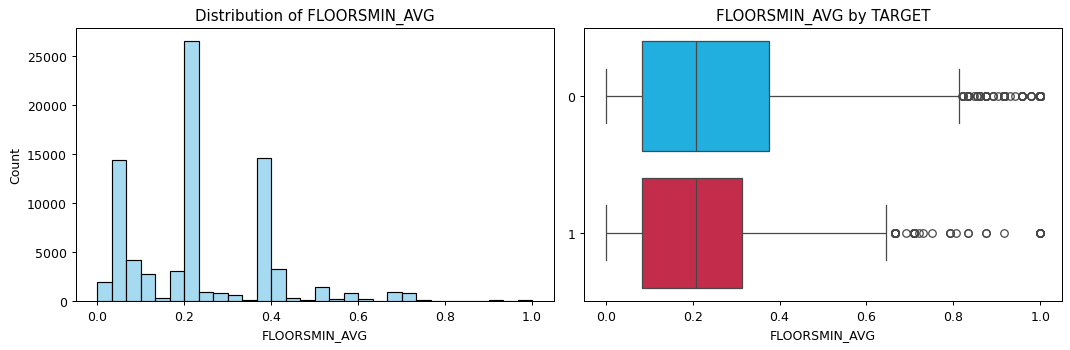

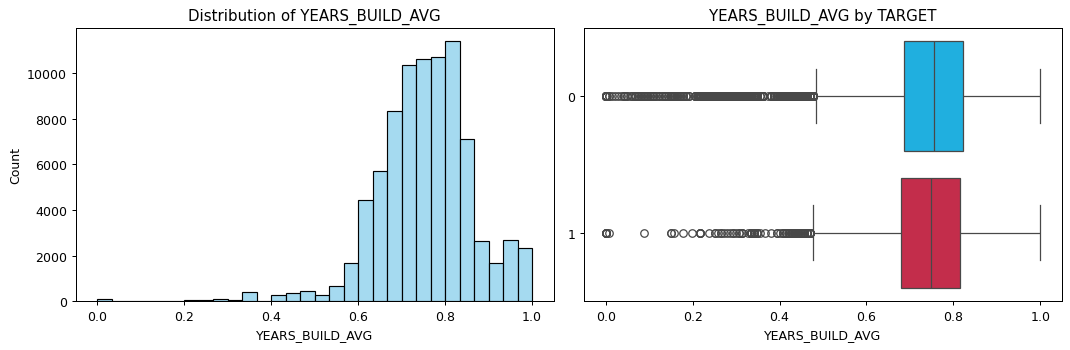

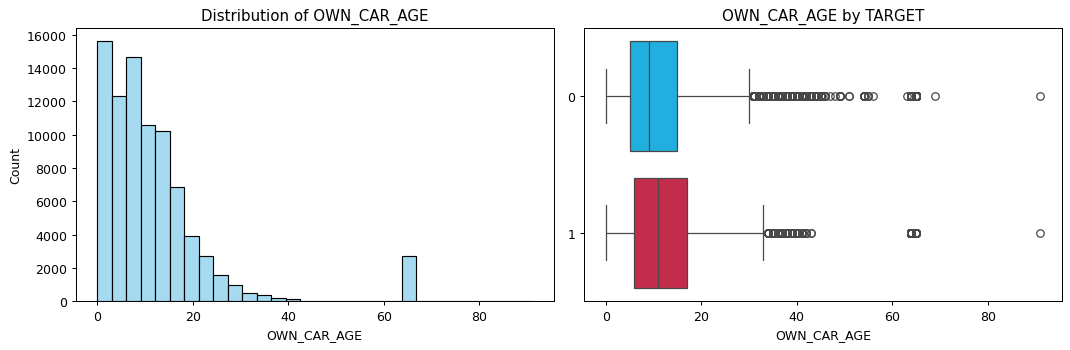

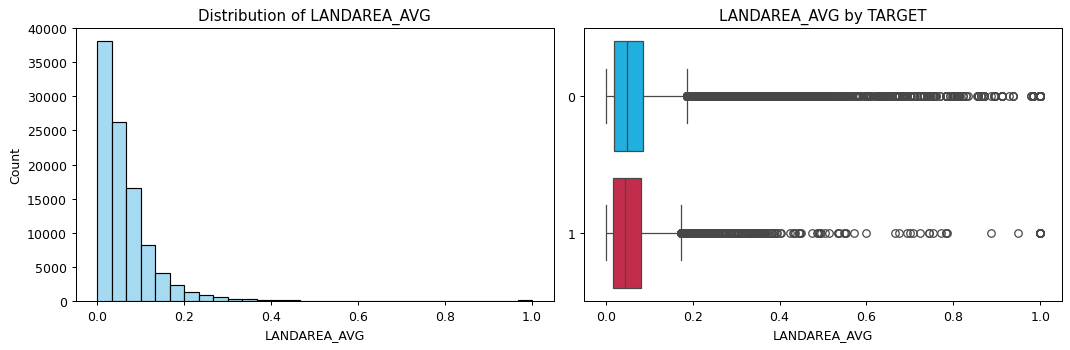

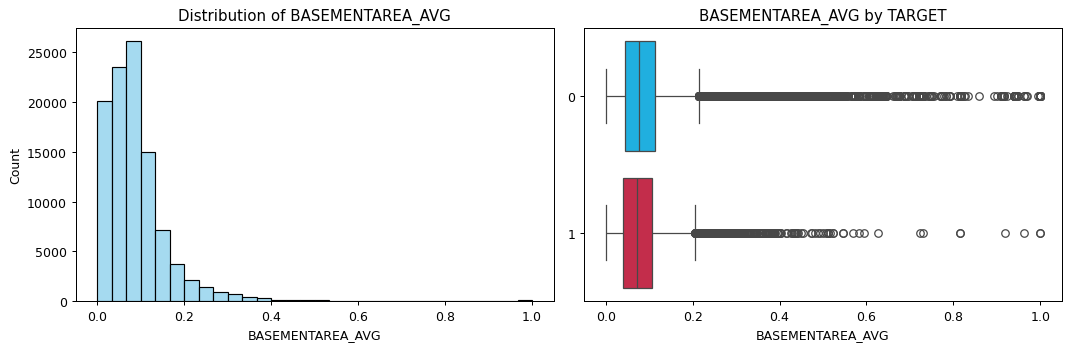

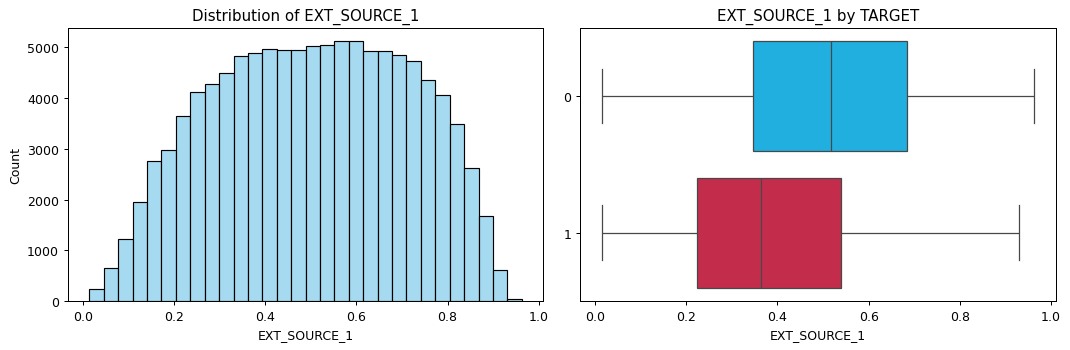

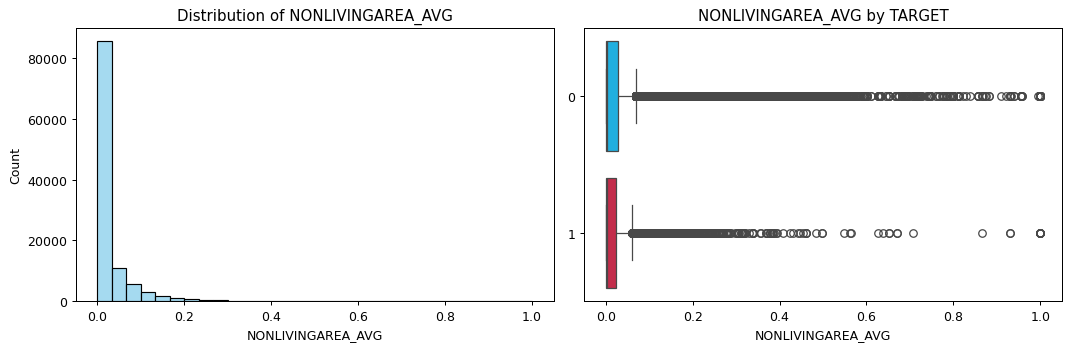

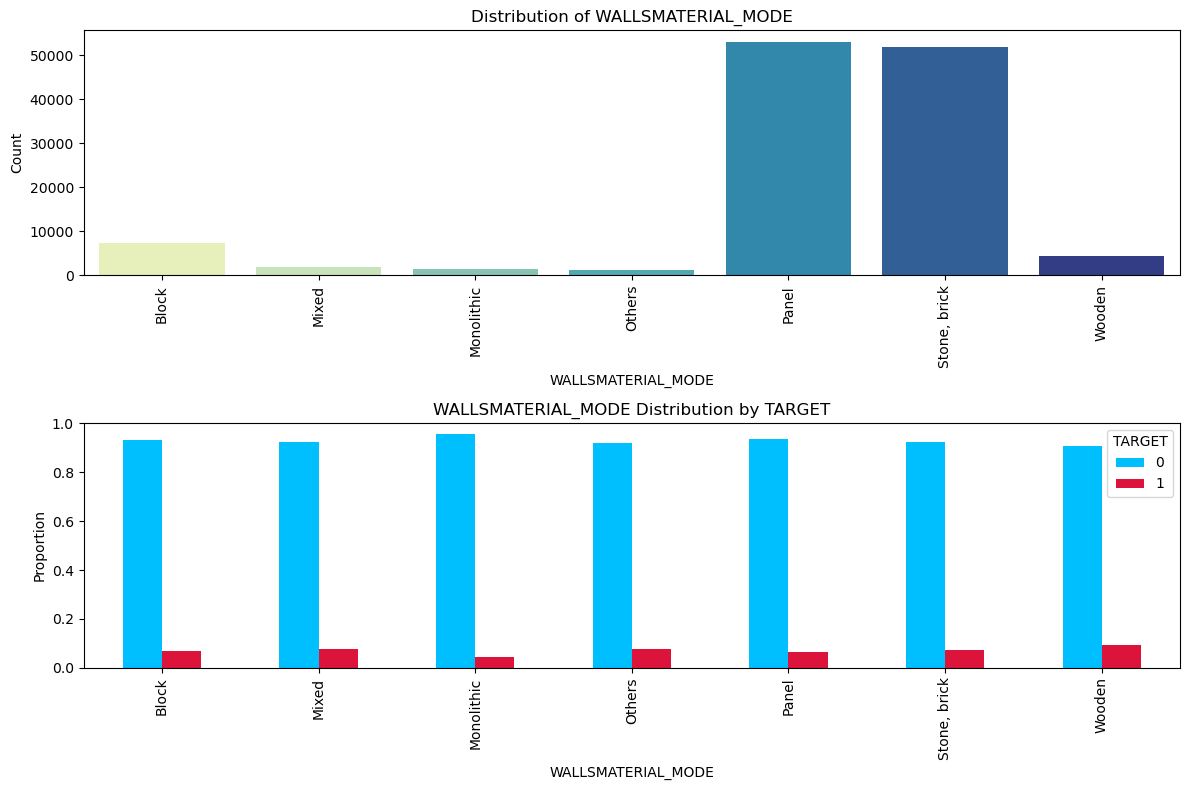

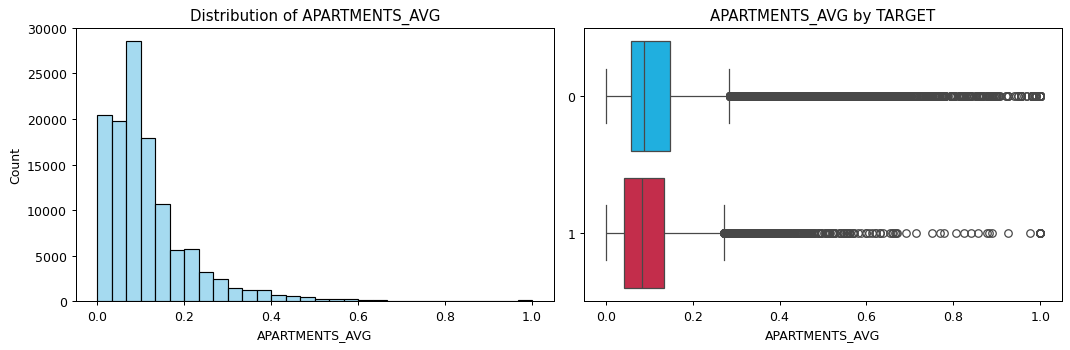

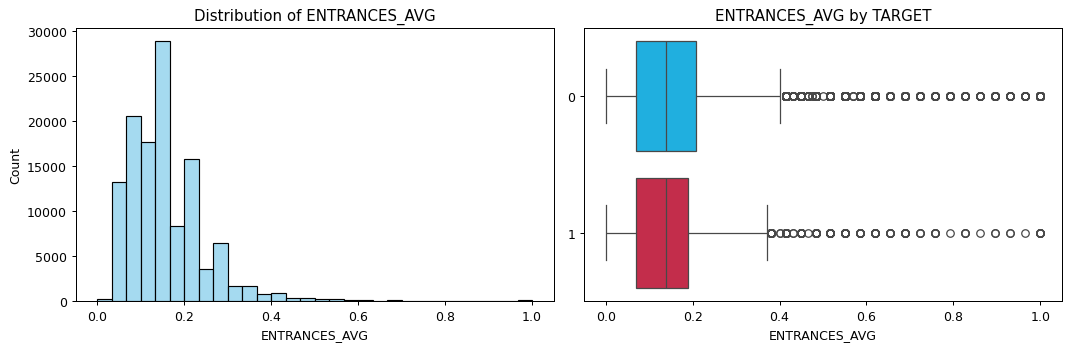

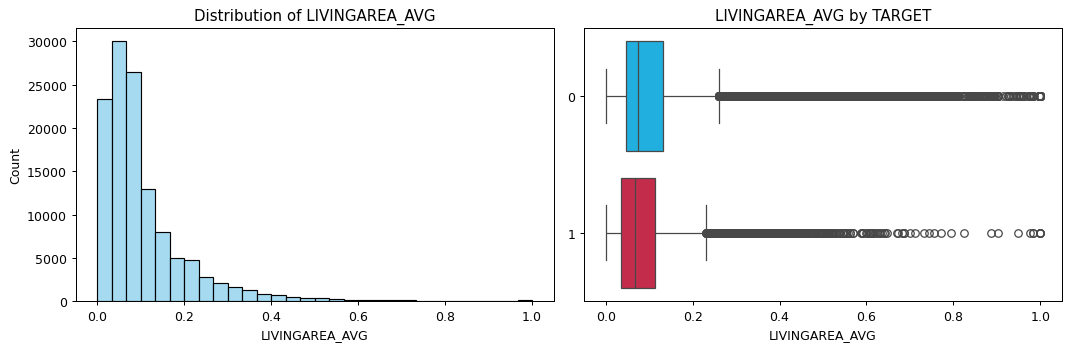

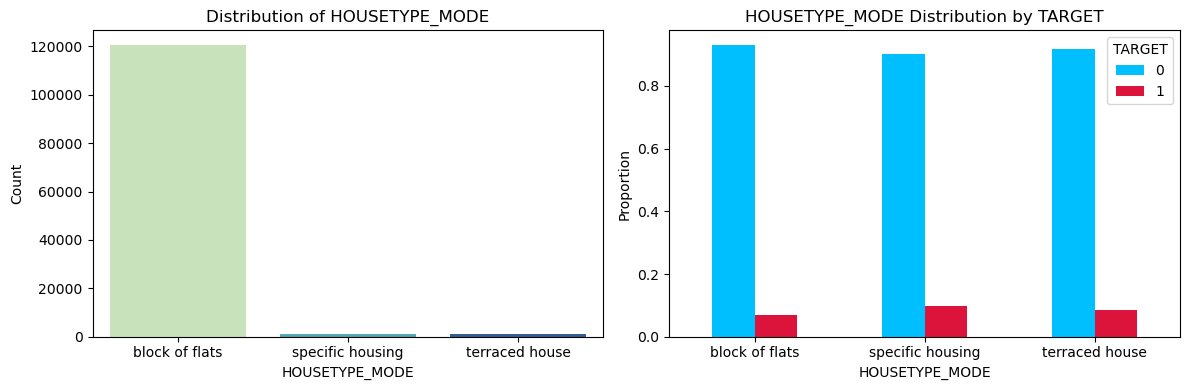

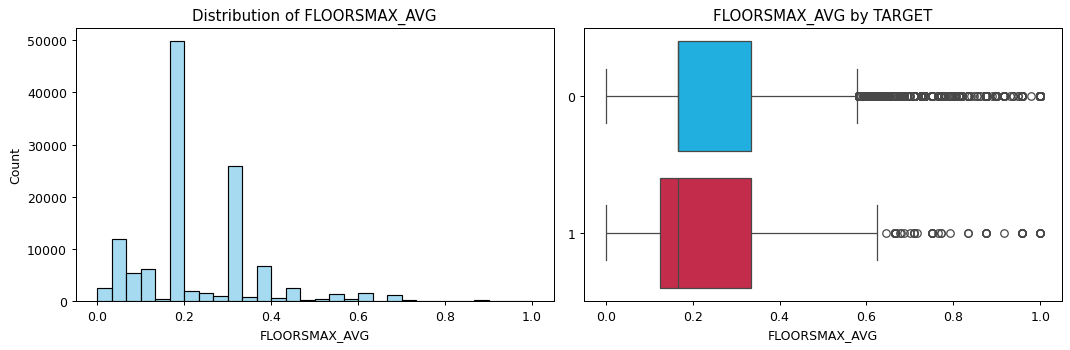

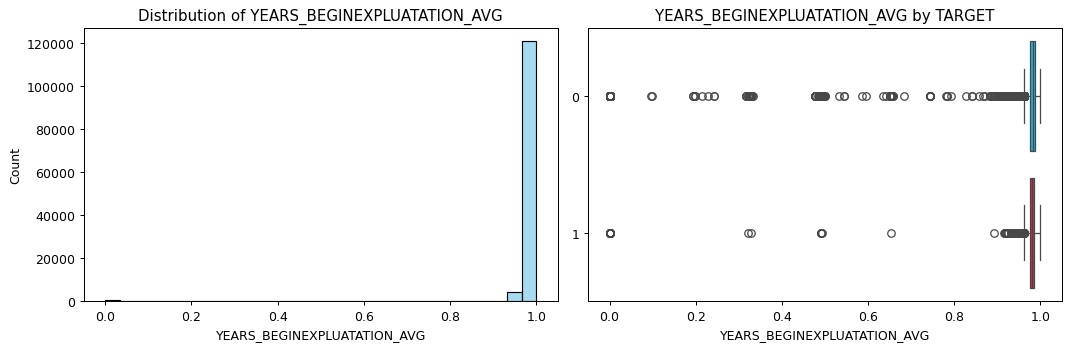

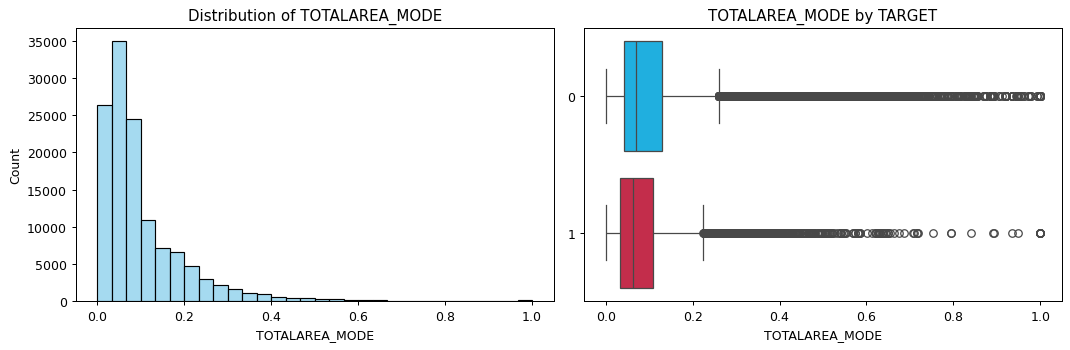

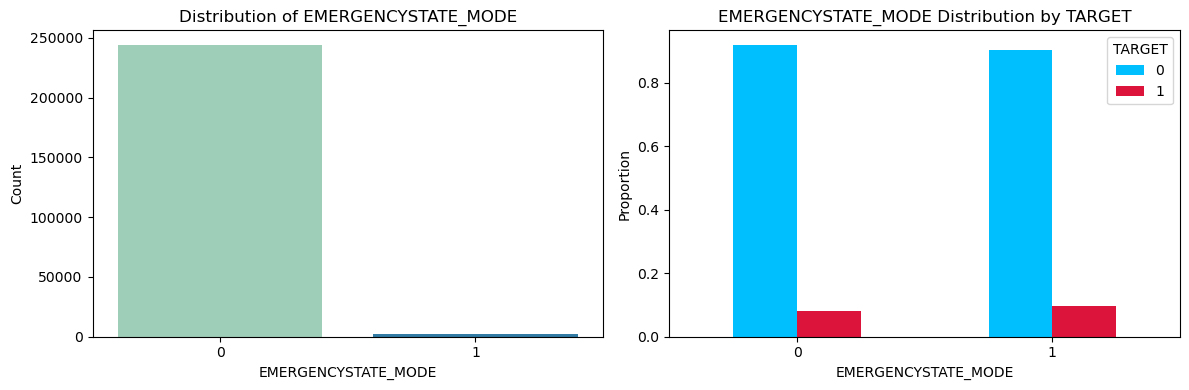

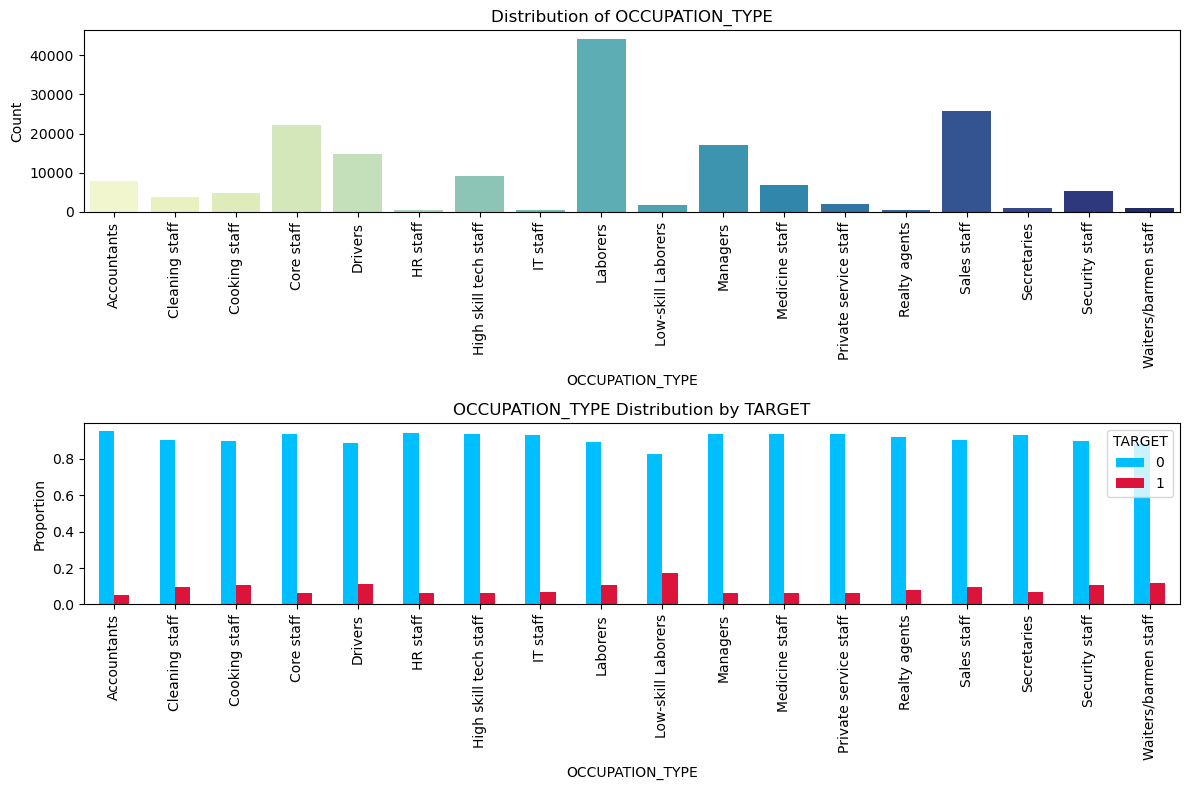

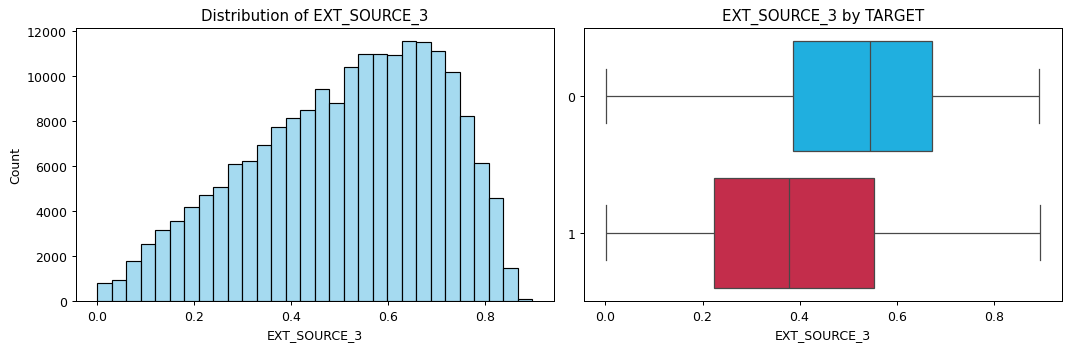

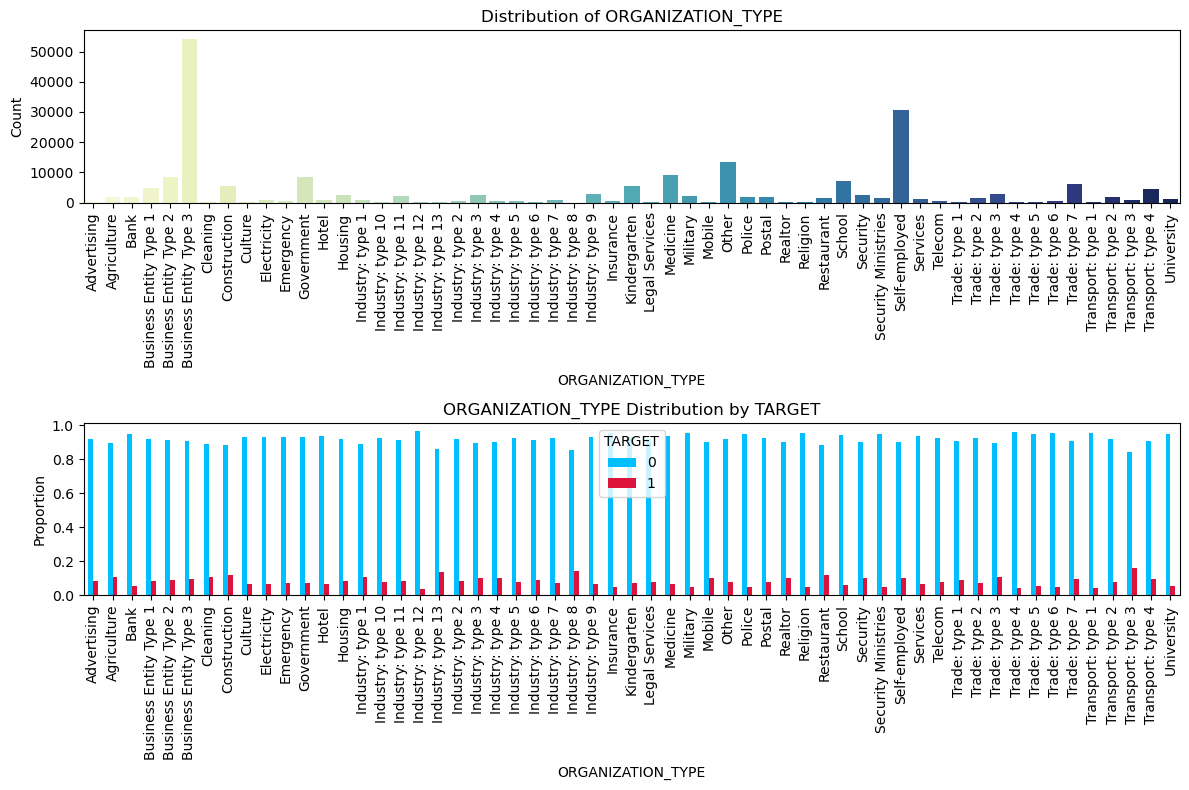

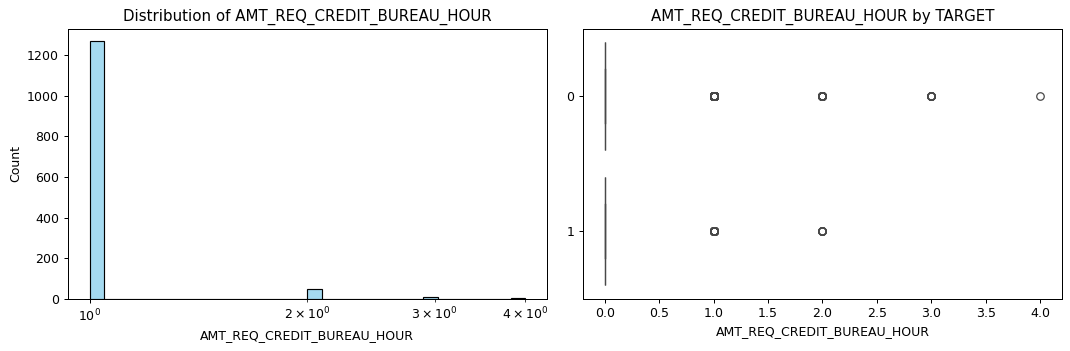

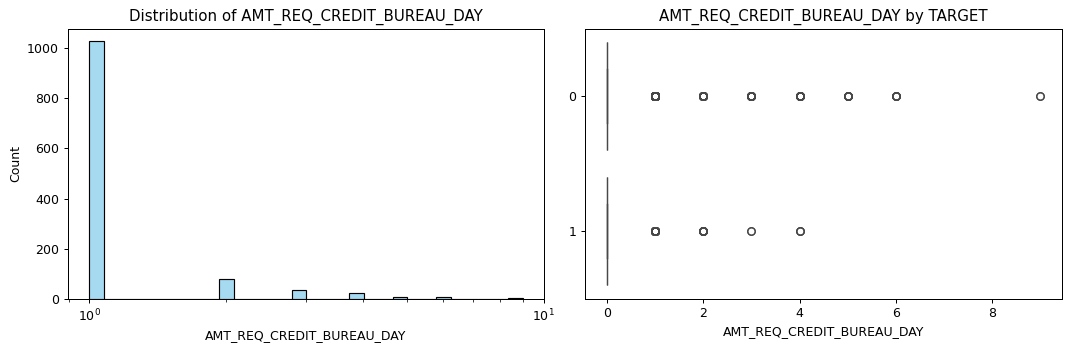

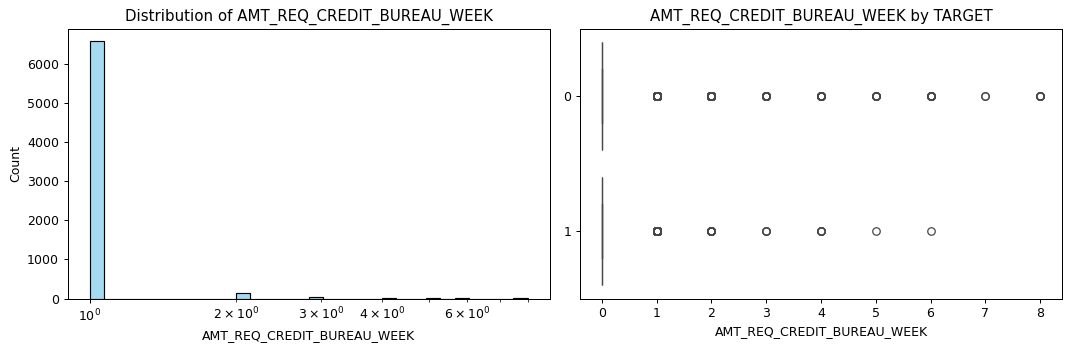

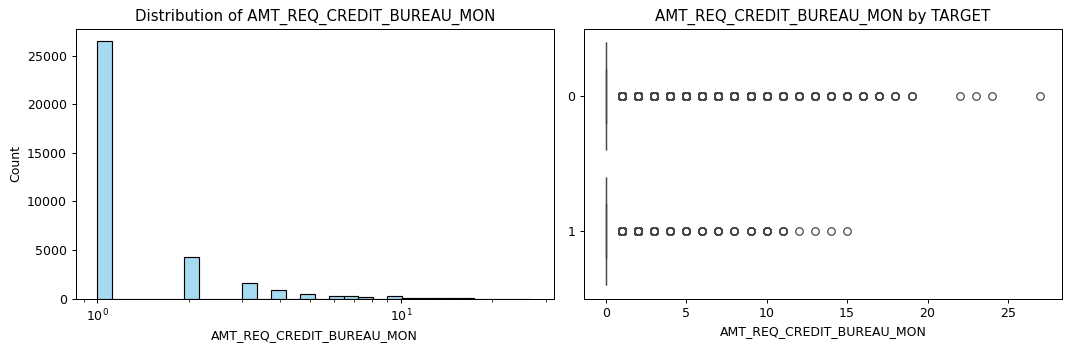

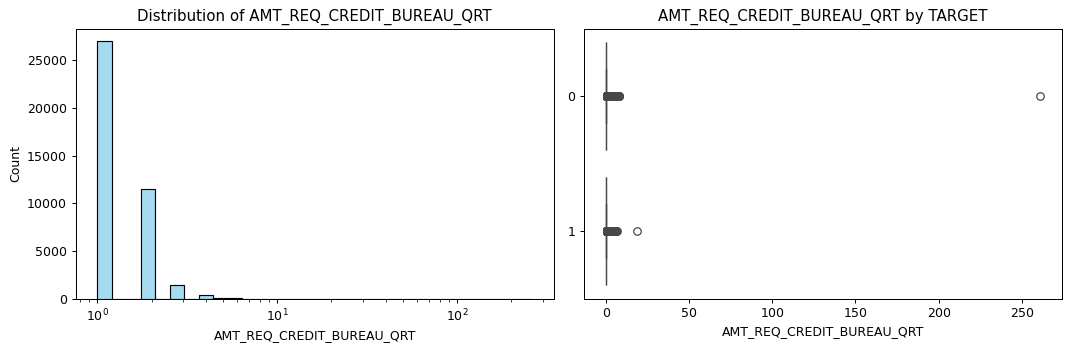

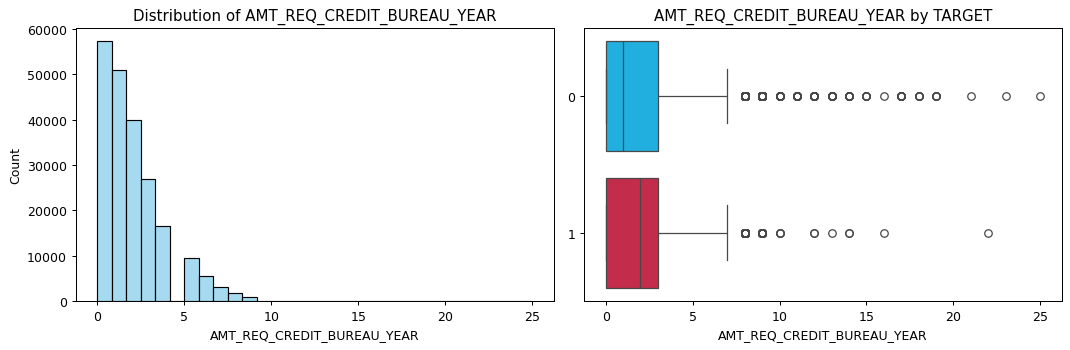

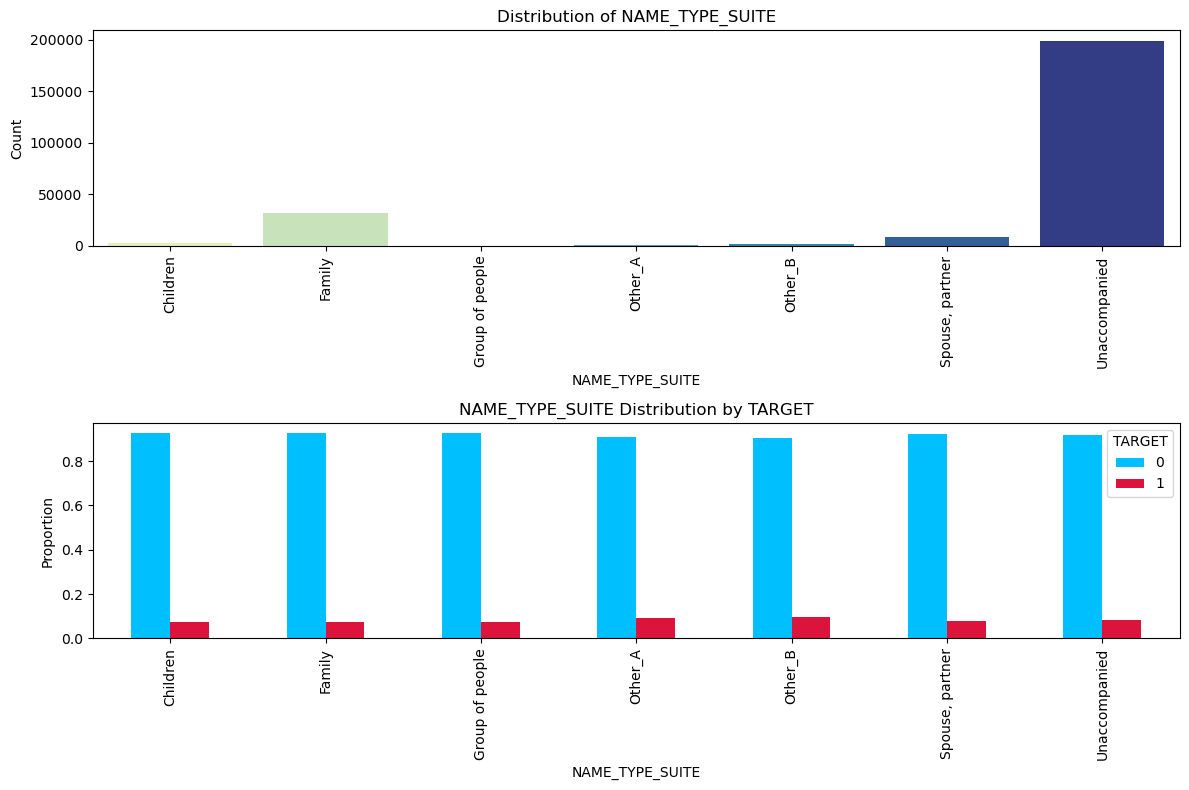

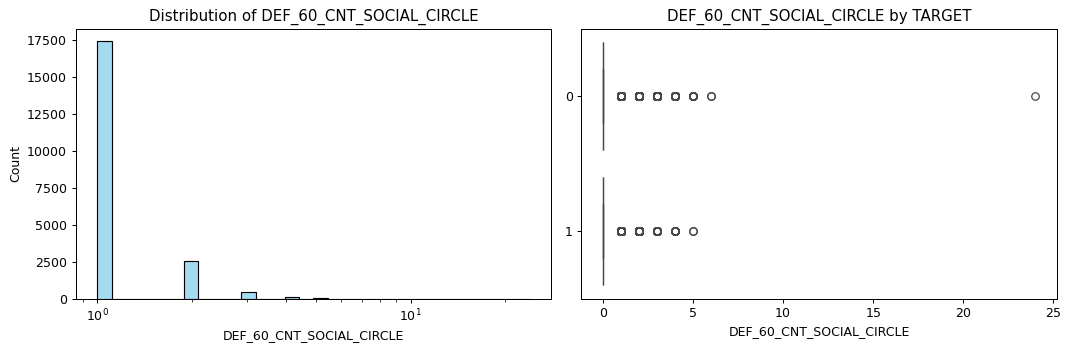

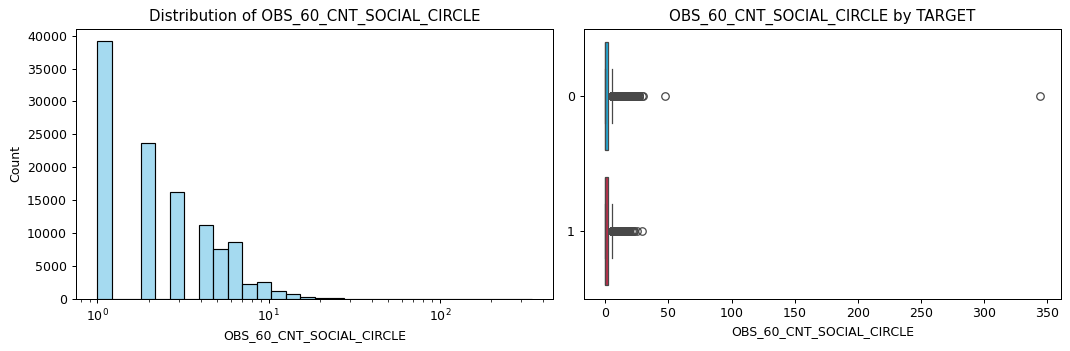

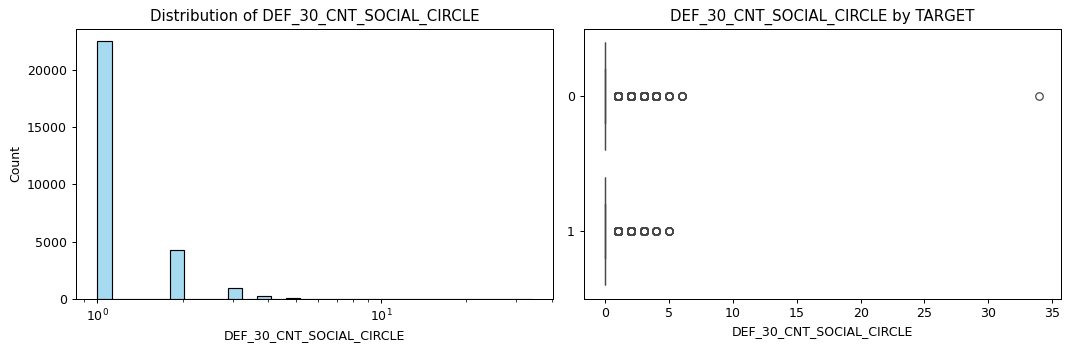

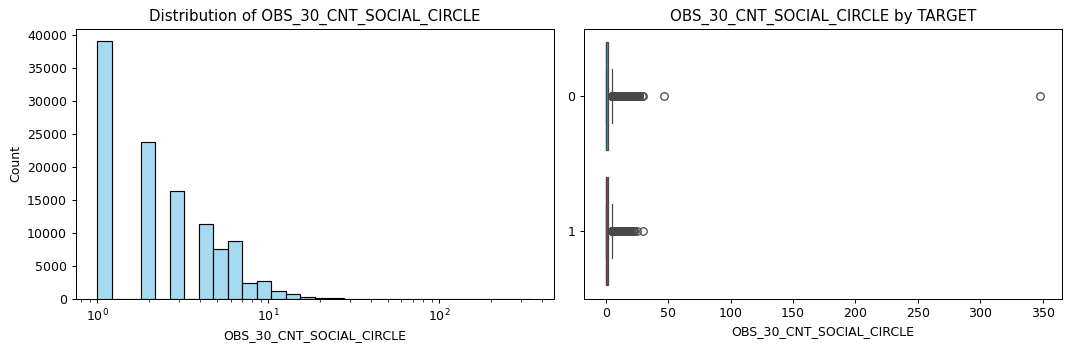

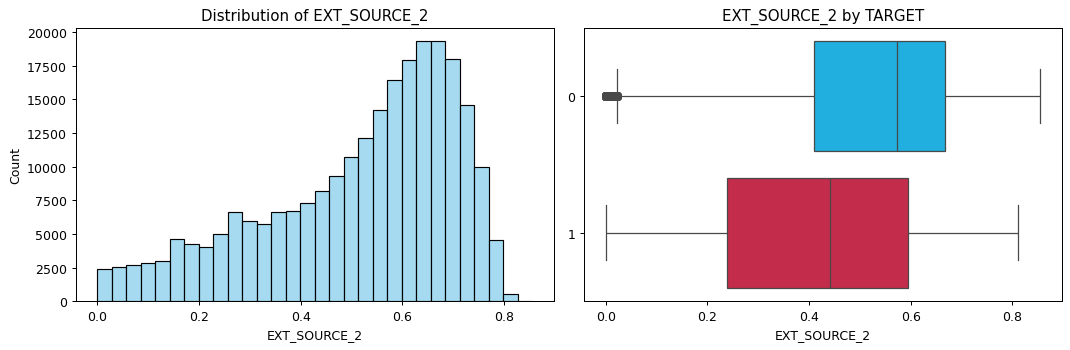

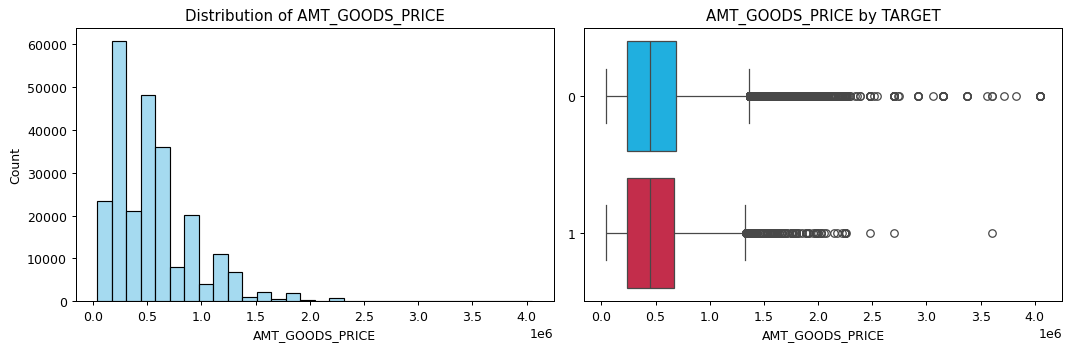

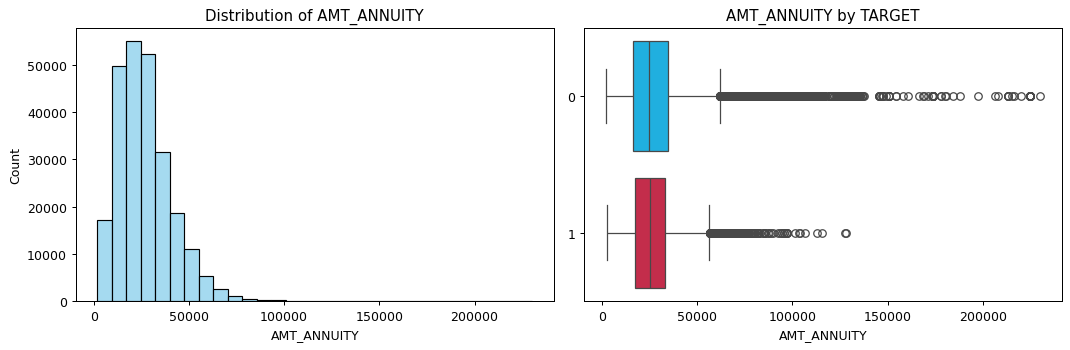

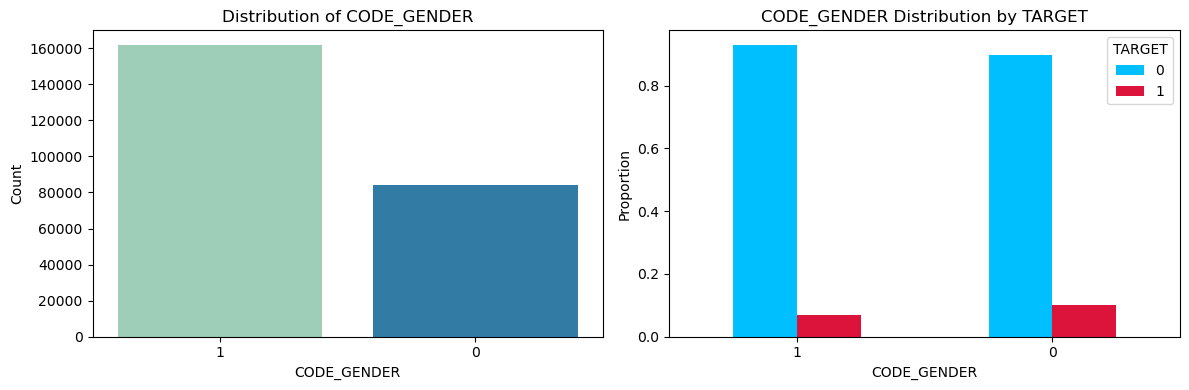

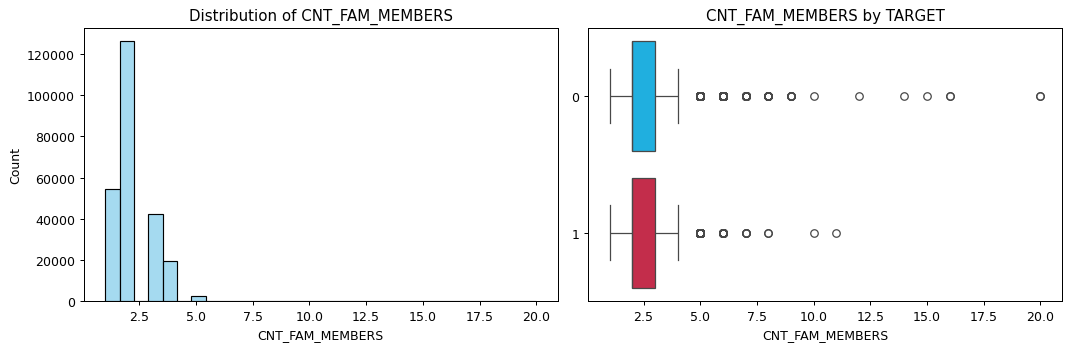

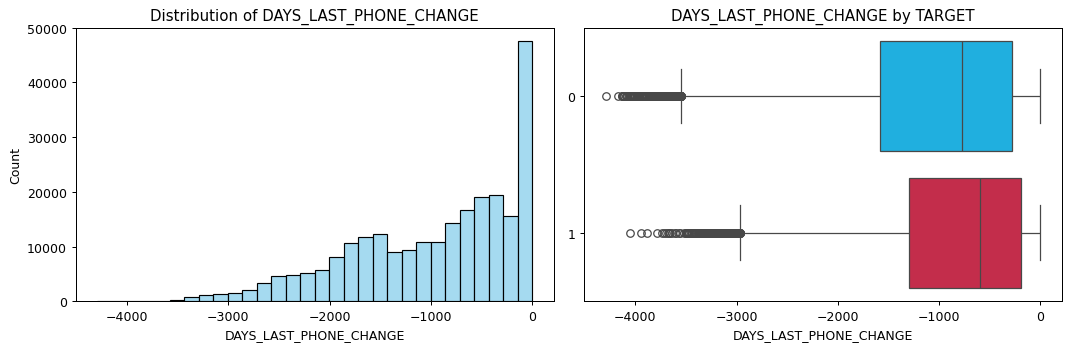

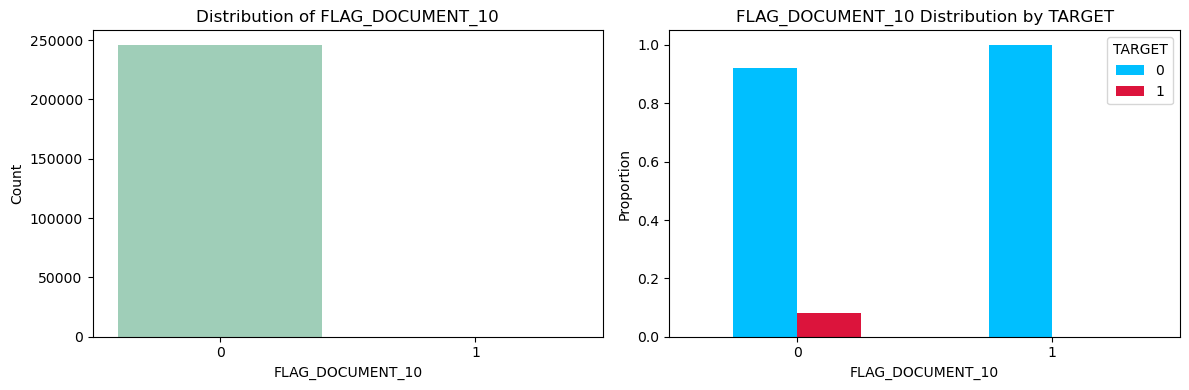

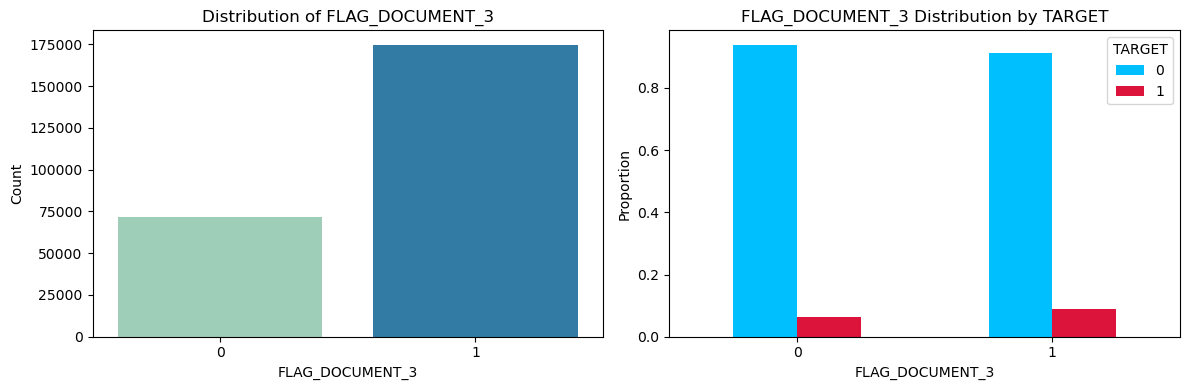

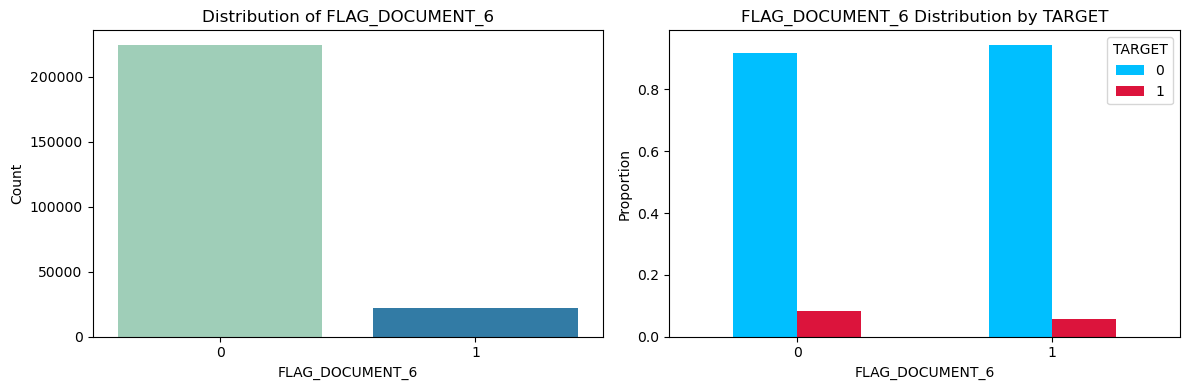

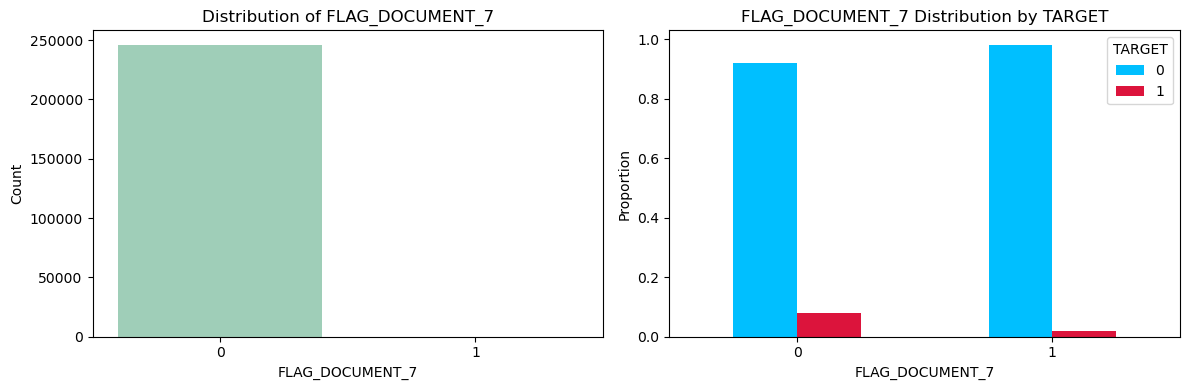

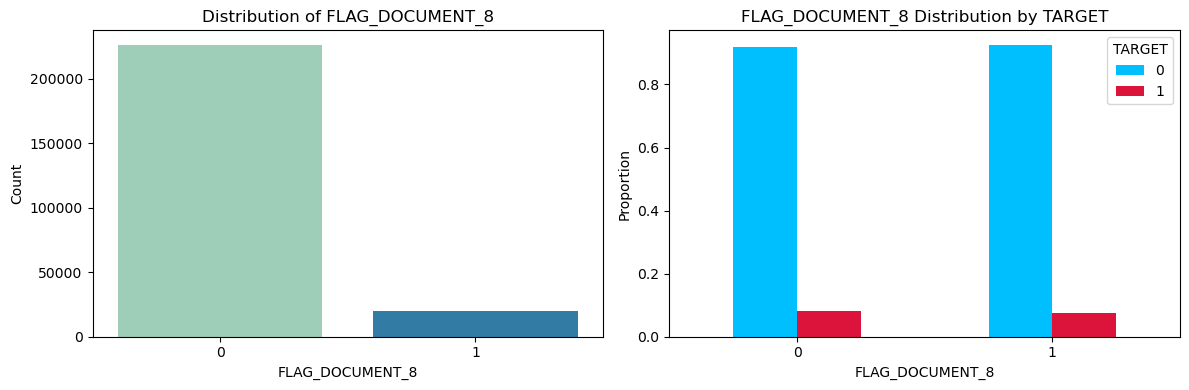

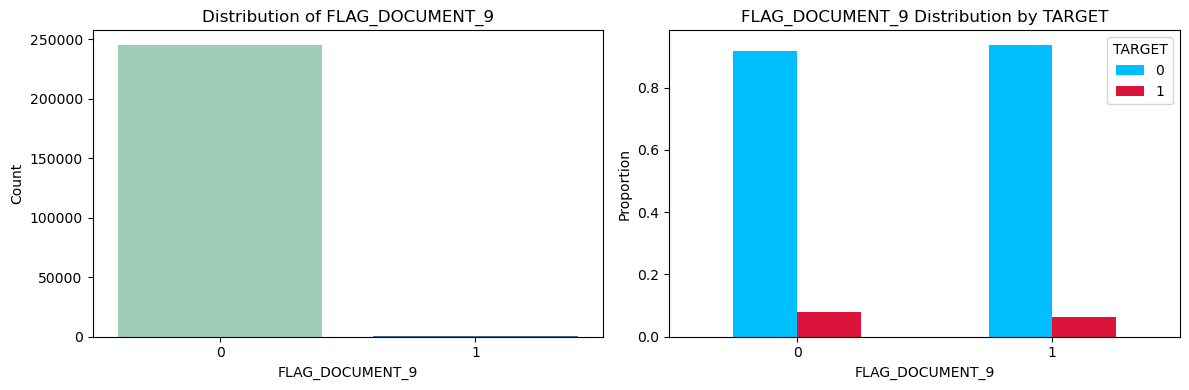

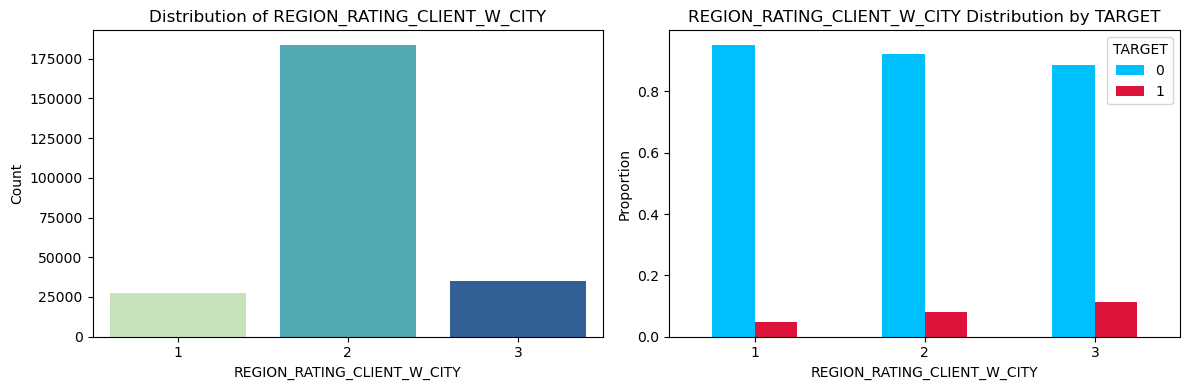

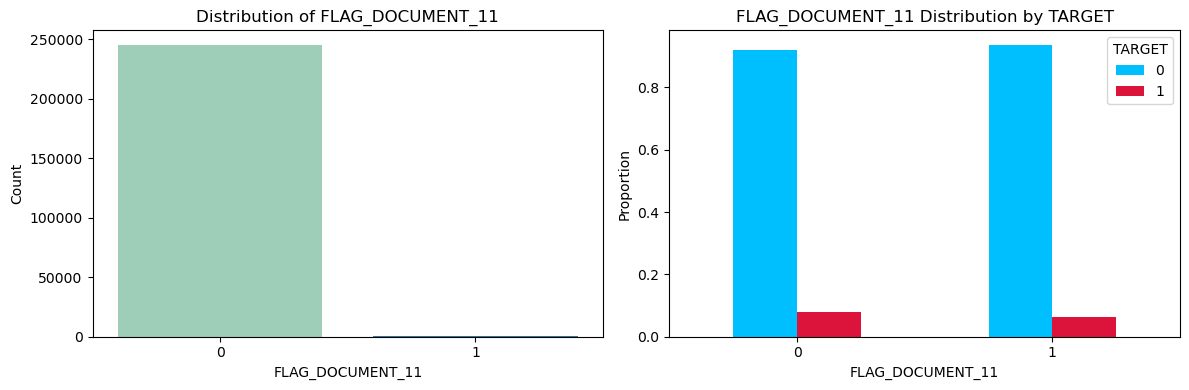

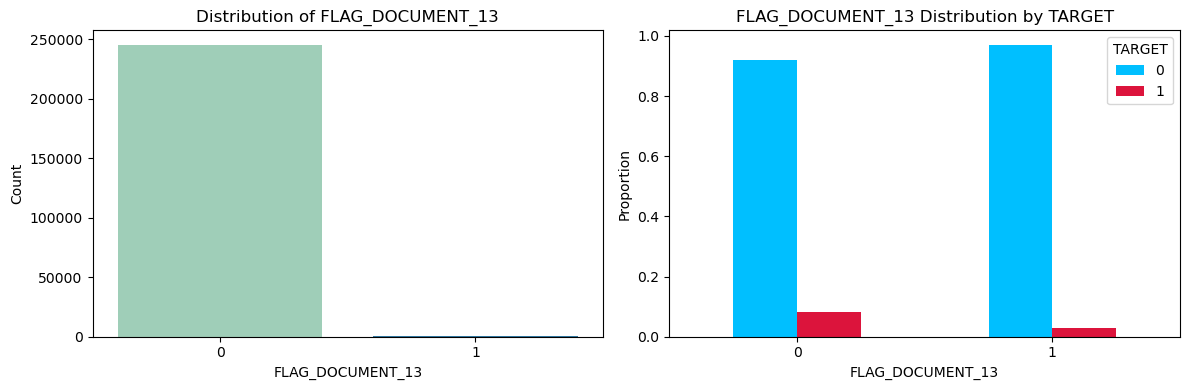

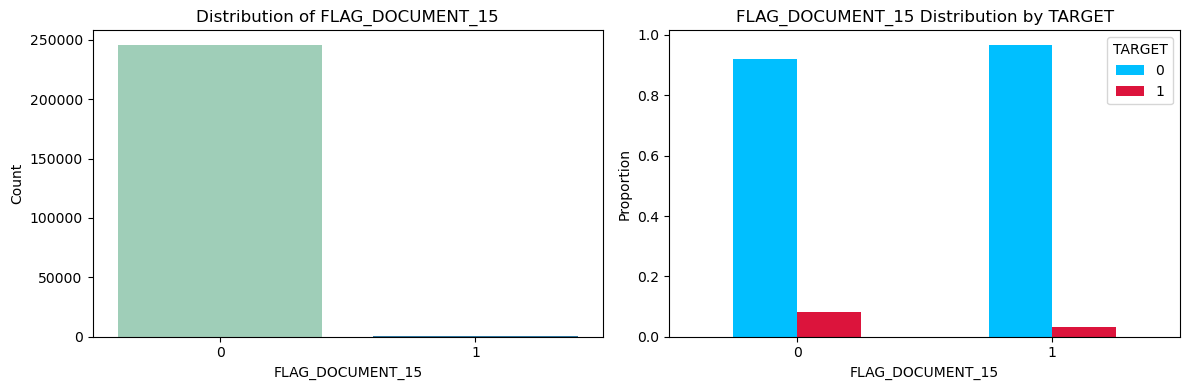

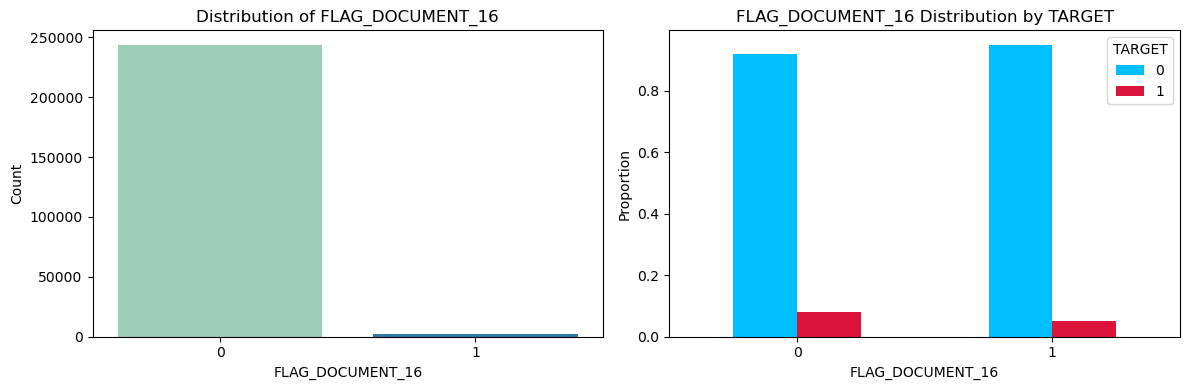

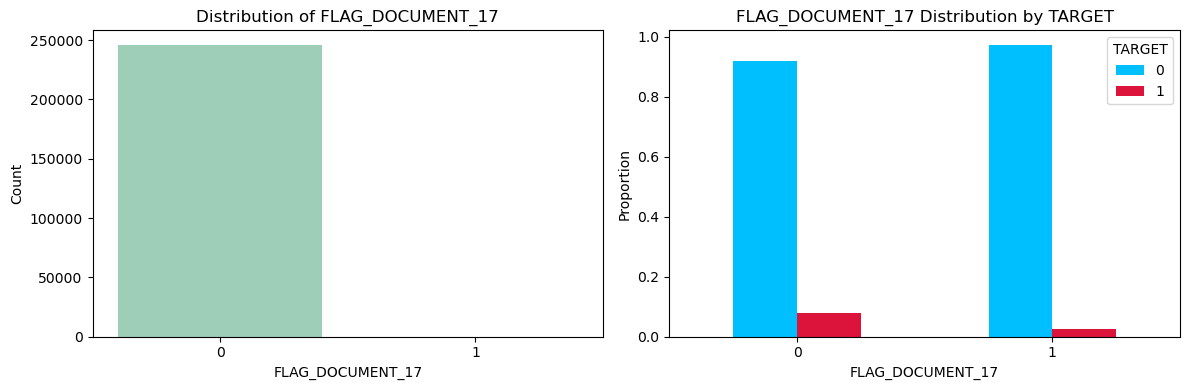

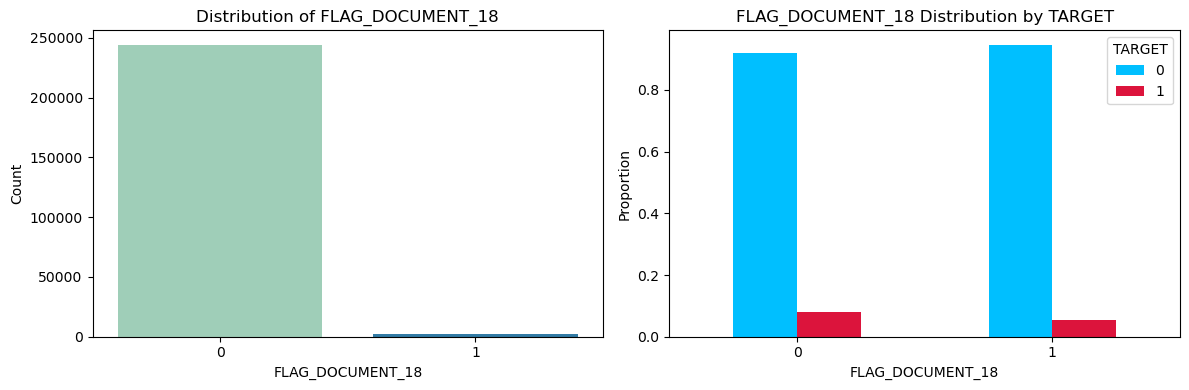

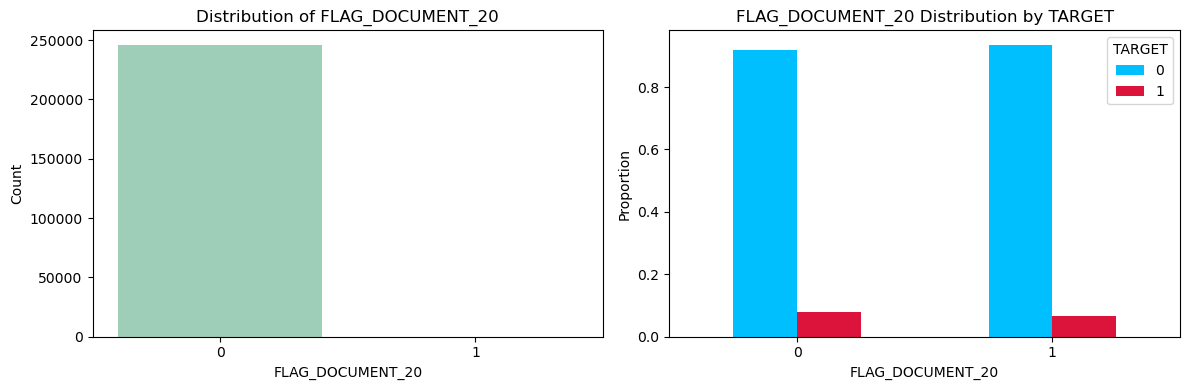

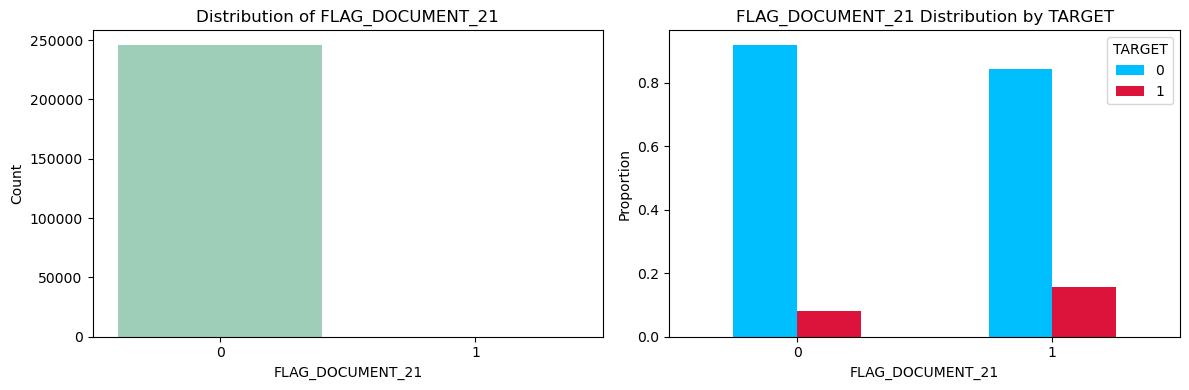

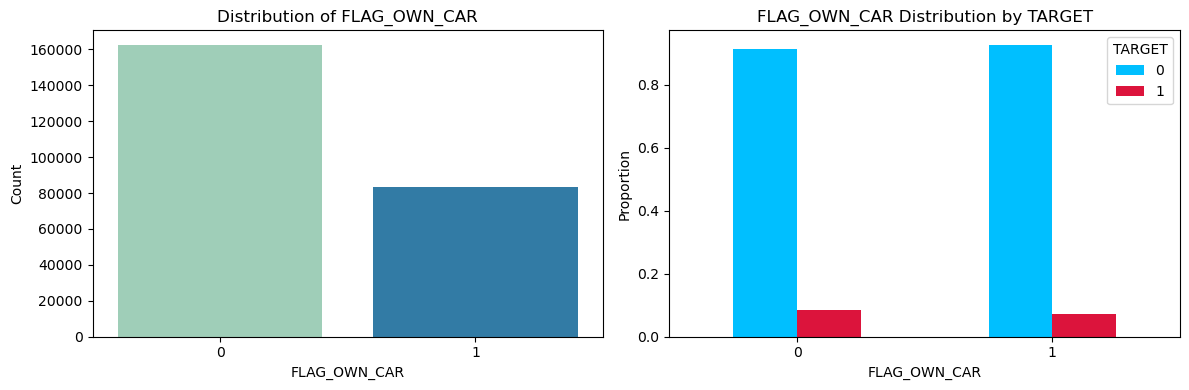

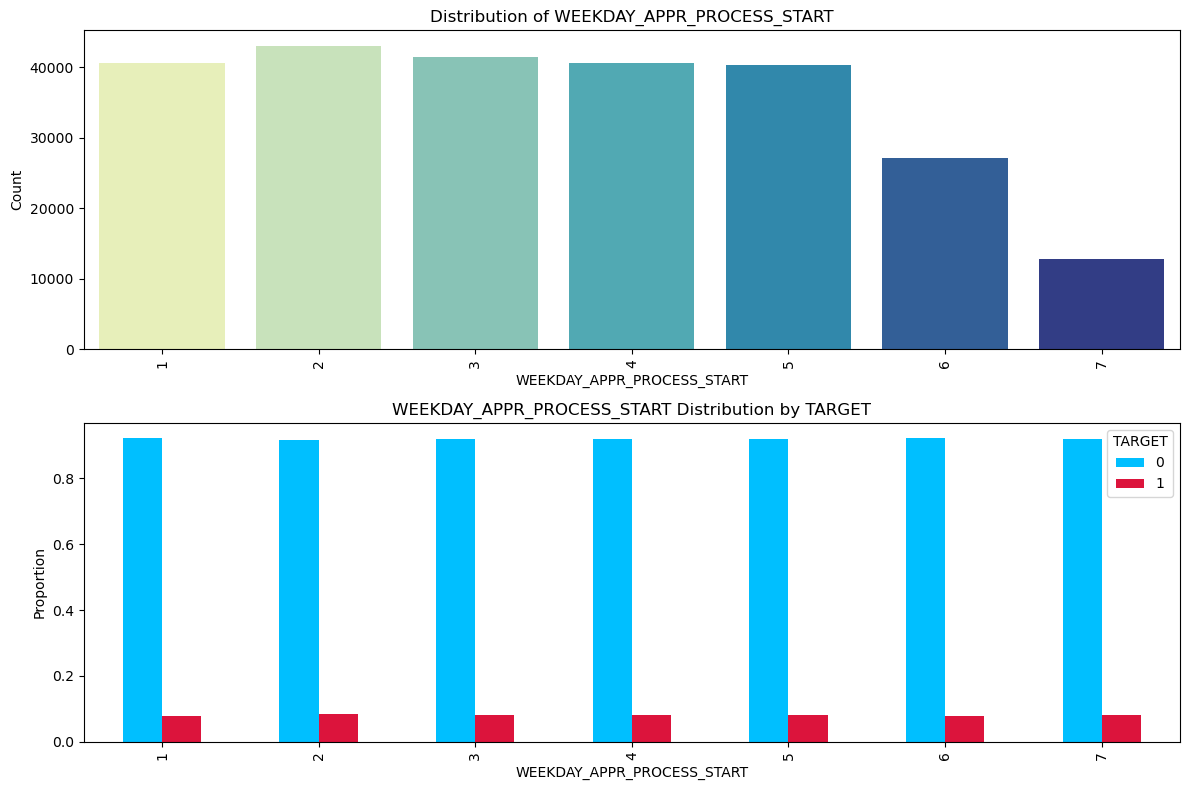

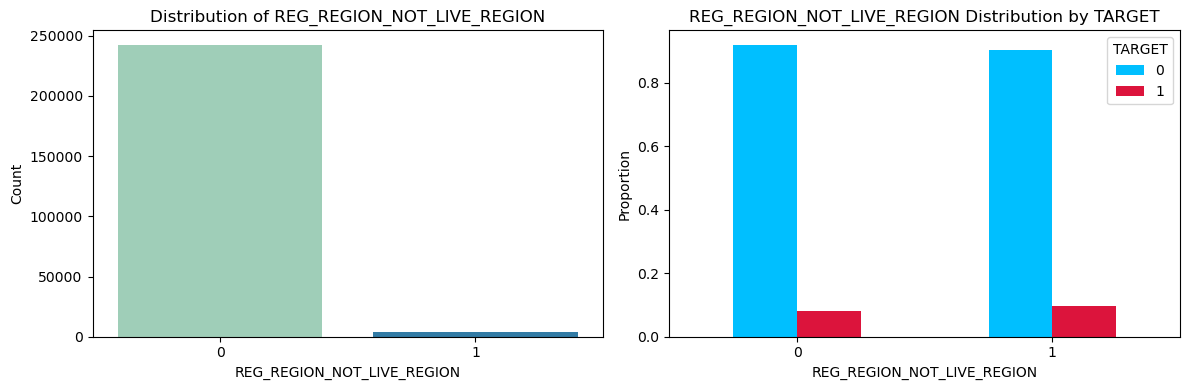

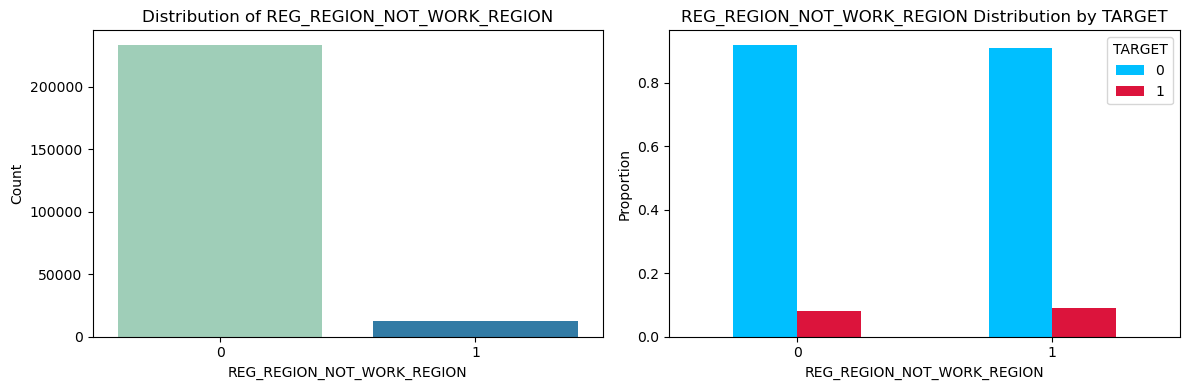

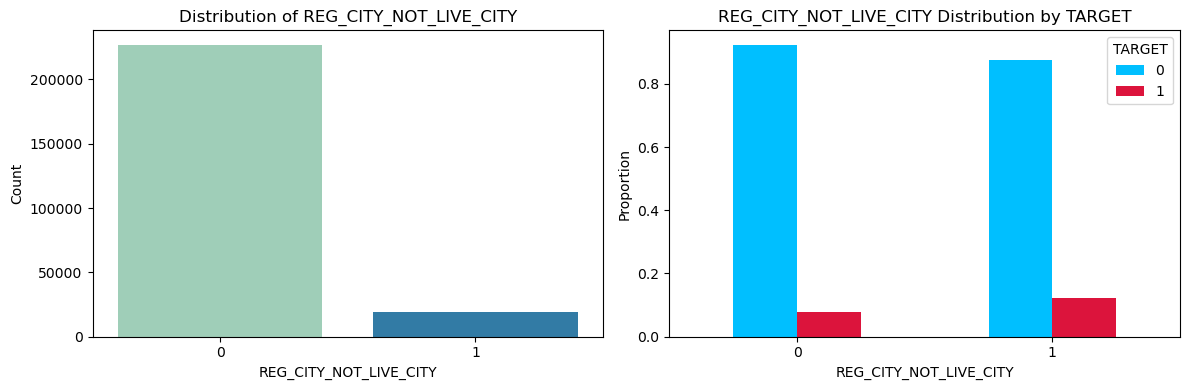

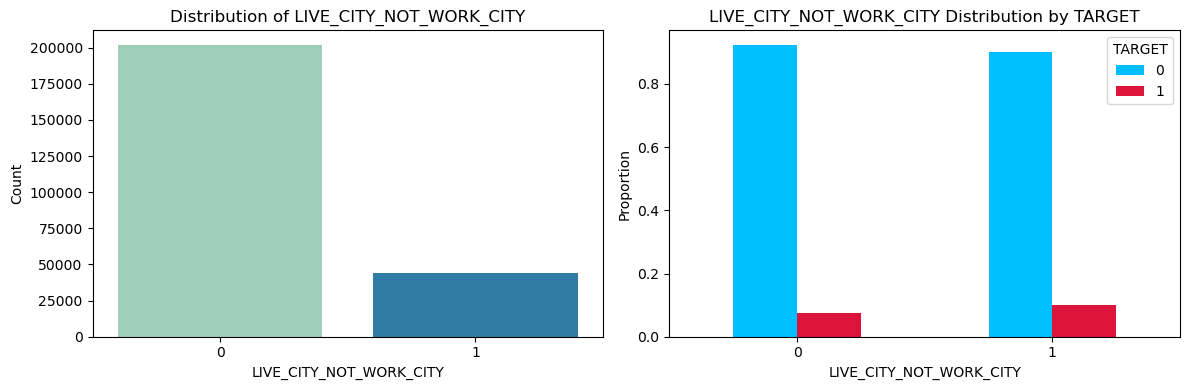

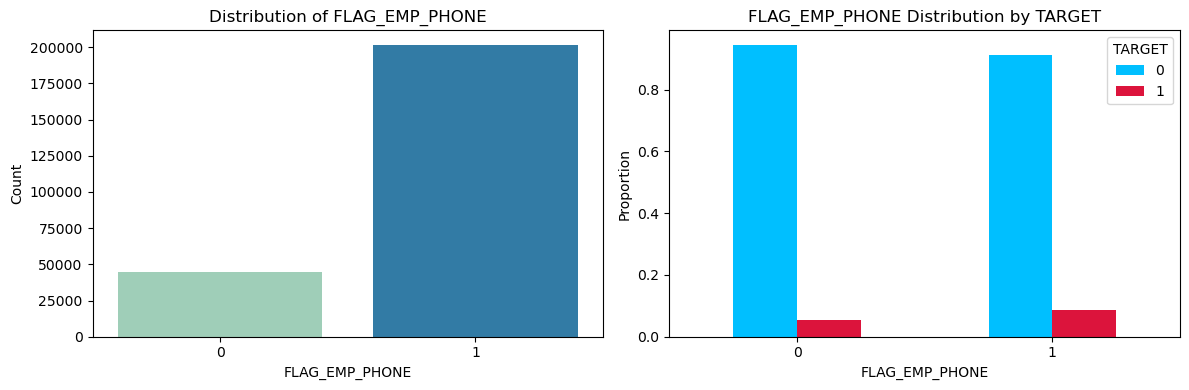

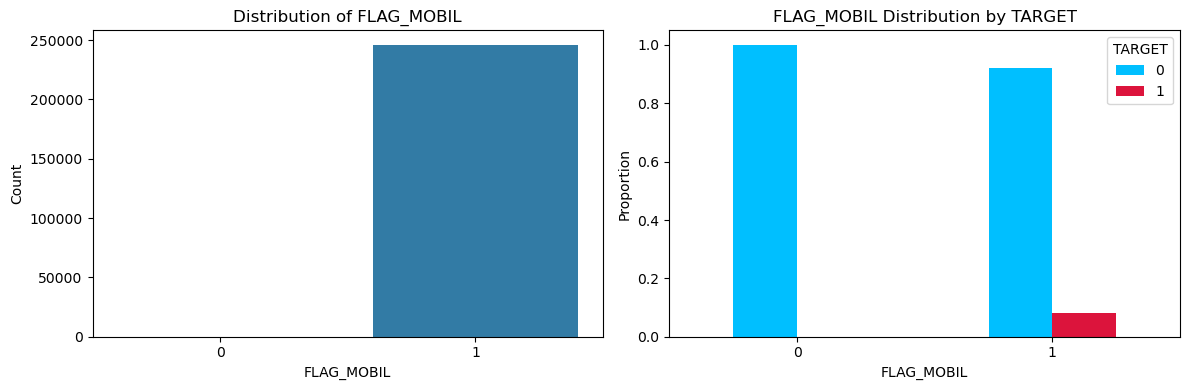

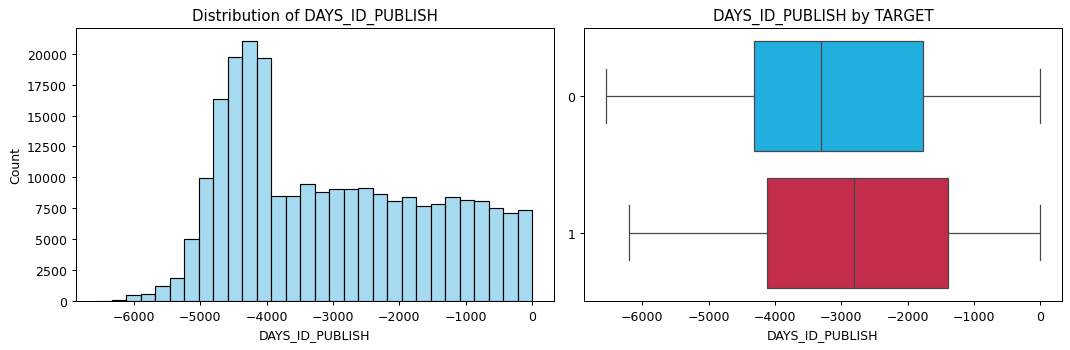

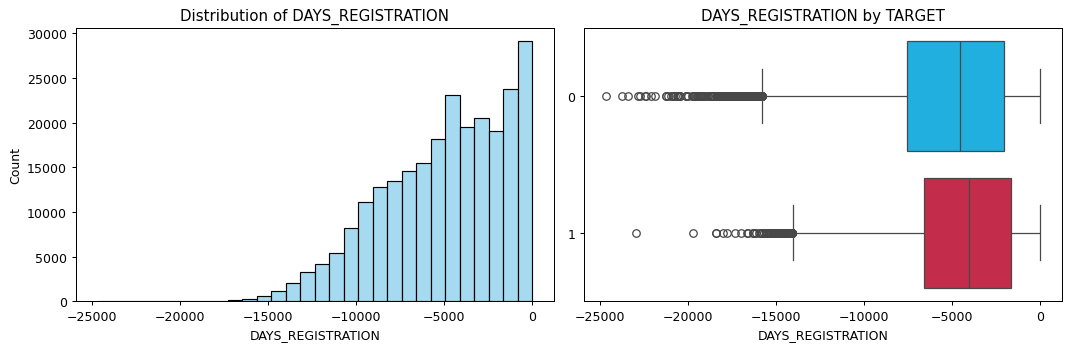

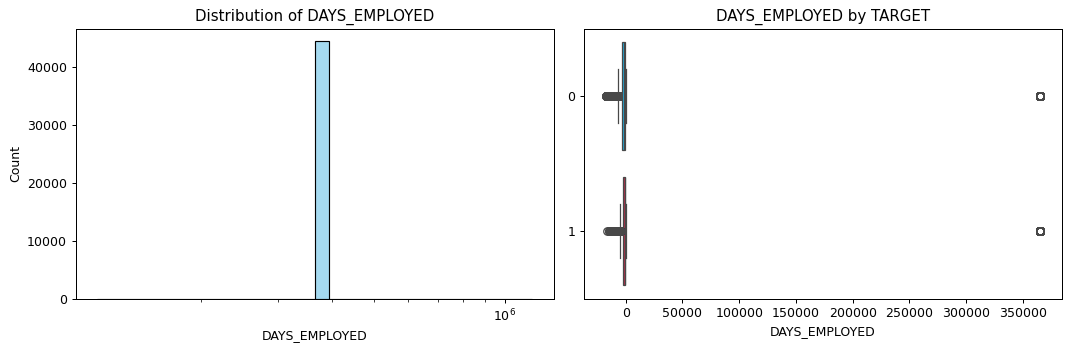

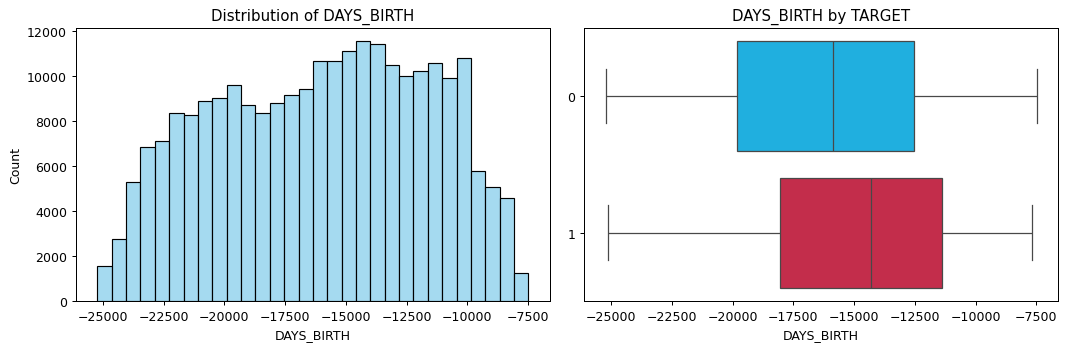

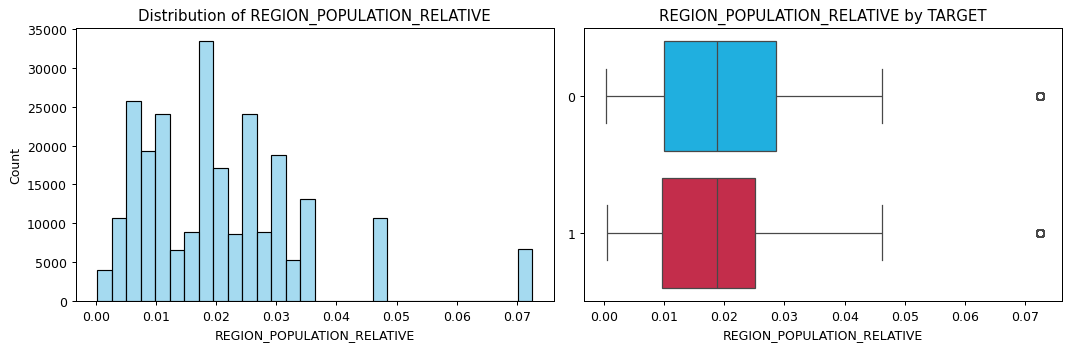

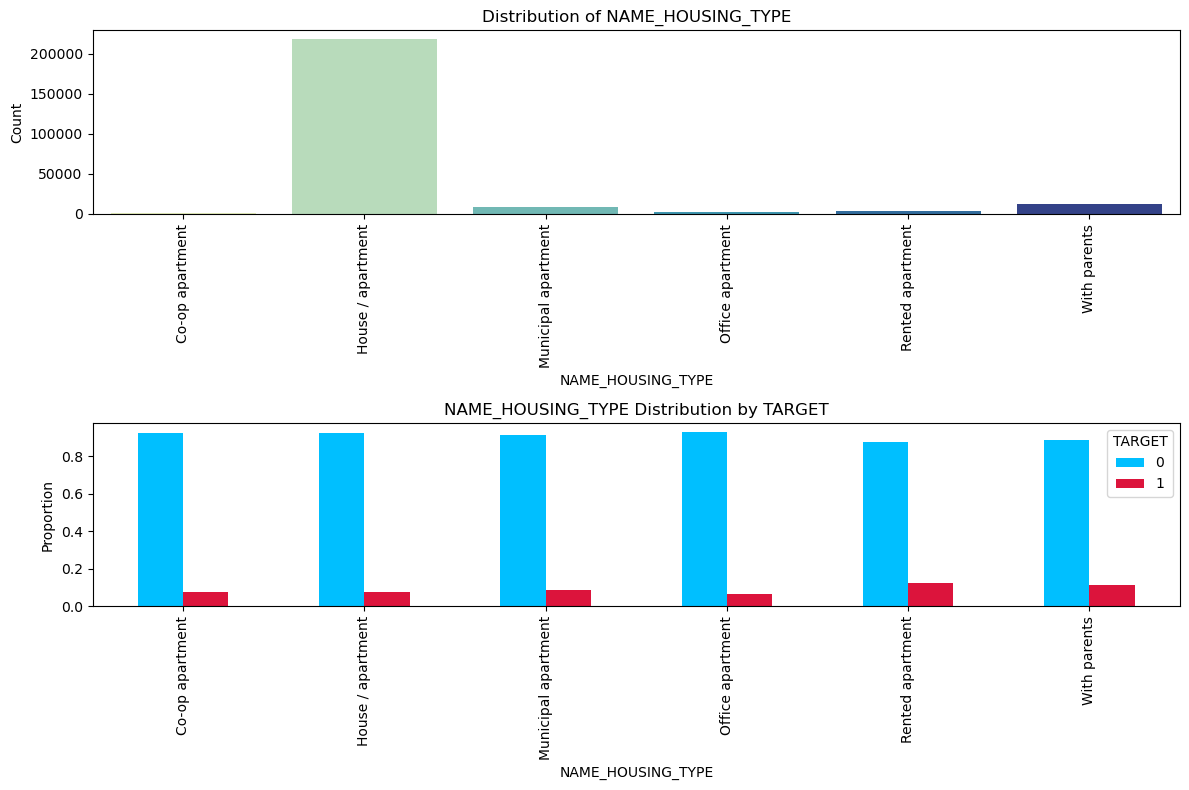

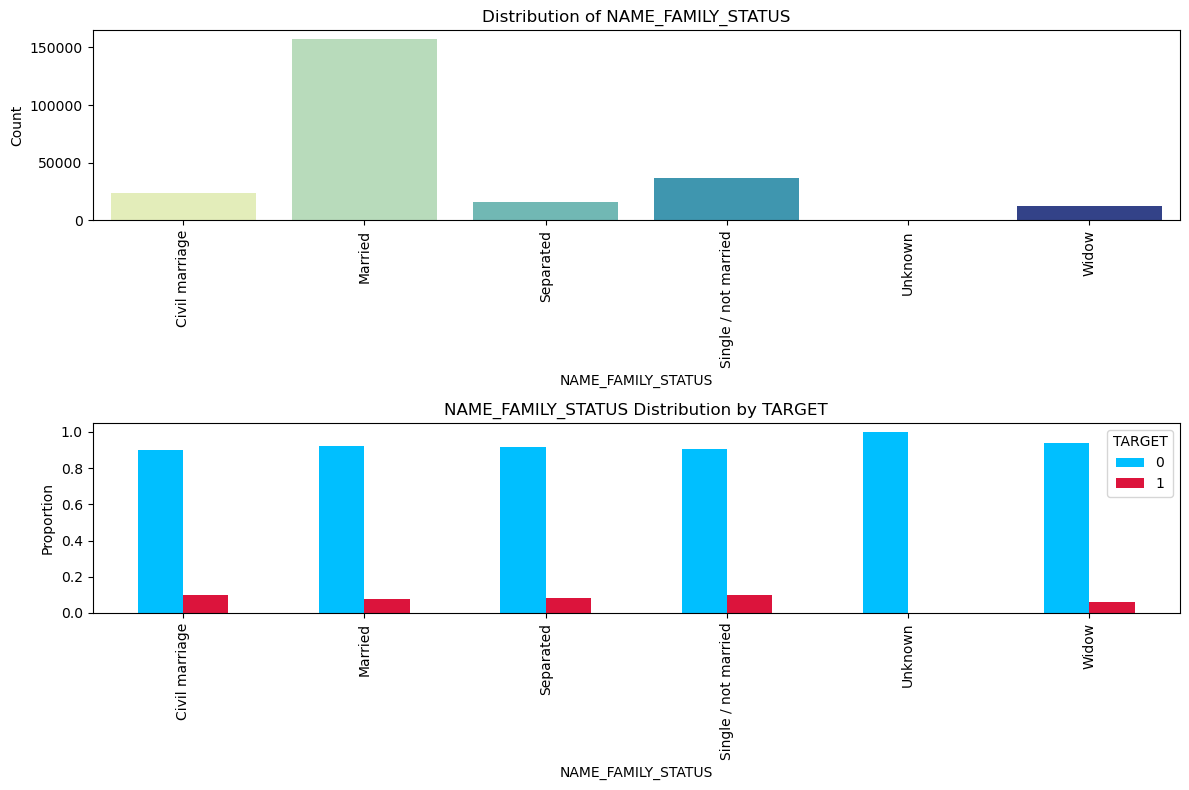

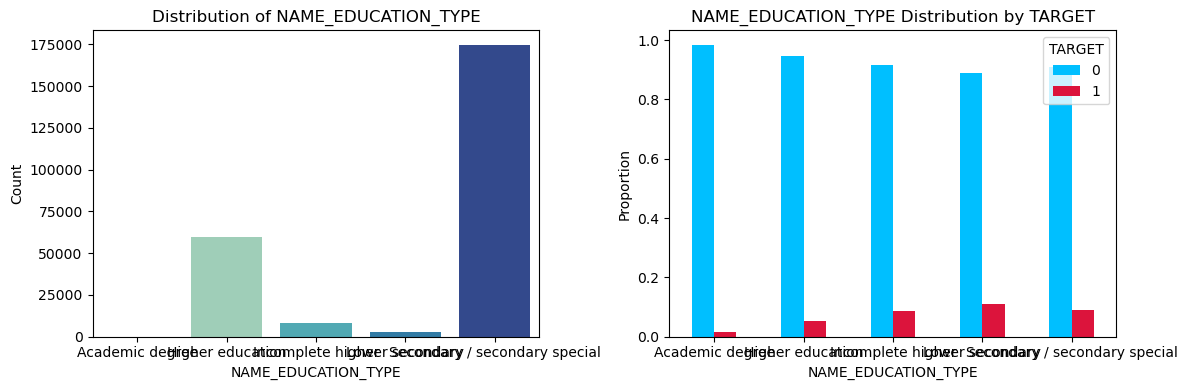

In [19]:
warnings.filterwarnings('ignore')
for i in list(pd_data_train.columns):
    if i in pd_data_num:
        f.custom_plot(pd_data_train, col_name=i, is_cont=True, target='TARGET')
    elif  ((i in pd_data_bool) | (i in pd_data_cat)) & (i!='TARGET'):
        f.custom_plot(pd_data_train, col_name=i, is_cont=False, target='TARGET')

Al analizar las variables visualmente, surgen algunos patrones interesantes. Algunas anotaciones clave basadas en los gráficos incluyen:

1. Relación entre ingresos y riesgo de incumplimiento:
Se observa que el fraude o riesgo de incumplimiento (TARGET=1) parece correlacionarse con ingresos más bajos o intermedios (NAME_INCOME_TYPE y AMT_INCOME_TOTAL). Sin embargo, las distribuciones también reflejan la predominancia de categorías como "Working" y "Commercial associate", lo que podría sesgar los resultados.

2. Impacto de la ocupación y nivel educativo:
Las categorías ocupacionales (OCCUPATION_TYPE) como "Low-skill laborers" muestran un porcentaje más alto de incumplimientos. Algo similar ocurre con niveles educativos más bajos (NAME_EDUCATION_TYPE), como "Secondary / secondary special", que presenta una mayor proporción de fraudes en comparación con niveles superiores.
Esto refuerza la hipótesis de que las características socioeconómicas juegan un papel relevante en la predicción del riesgo.

3. Diferencias demográficas importantes:
En las variables como DAYS_BIRTH y DAYS_EMPLOYED, hay indicios de que las personas más jóvenes tienden a tener una mayor proporción de TARGET=1, mientras que la estabilidad laboral prolongada está asociada a menores niveles de incumplimiento.

4. Regiones y movilidad:
Variables como REG_CITY_NOT_WORK_CITY y LIVE_CITY_NOT_WORK_CITY muestran una mayor proporción de fraudes en clientes que residen o trabajan en diferentes ciudades. Esto puede reflejar riesgos asociados a movilidad geográfica o inestabilidad en el lugar de residencia.

5. Documentos presentados:
Las variables relacionadas con FLAG_DOCUMENT no muestran una relación clara con el TARGET, aunque podrían indicar problemas en la documentación presentada por ciertos clientes. Esto podría ser más relevante en combinaciones con otras variables.

6. Regiones con mayor riesgo:
Variables como REGION_POPULATION_RELATIVE muestran que las áreas menos densamente pobladas tienden a tener un mayor riesgo asociado. Sin embargo, las diferencias entre los valores de TARGET no son drásticas.

7. Riesgo y edad de la vivienda:
Las variables relacionadas con la antigüedad de las propiedades (YEARS_BEGINEXPLUATATION_AVG) reflejan una ligera tendencia hacia un mayor riesgo de incumplimiento en propiedades más antiguas. Esto puede estar relacionado con la capacidad económica de los propietarios para mantener estas propiedades.

8. Desbalance de la variable objetivo:
La variable objetivo está muy desbalanceada, con una proporción muy baja de TARGET=1. Esto sugiere que será necesario implementar técnicas de re-balanceo, como oversampling o ajustes específicos en el modelado.

Los gráficos revelan tendencias importantes que deben tenerse en cuenta en el preprocesamiento y modelado. Muchas variables parecen tener potencial predictivo, aunque la presencia de outliers, valores imputados y distribuciones altamente sesgadas requiere especial atención. Es importante profundizar en las interacciones entre variables clave y realizar pruebas estadísticas para confirmar estas hipótesis antes de proceder al modelado.

## Tratamiento de las variables continuas

### Tratamiento de outliers

Los valores outlier se pueden sustituir por la media, mediana, valores extremos (media+3std o media-3std). Tras el siguiente análisis, hemos decidido como primera iteración dejarlos sin sustituir. Una vez llegue al modelo puedo realizar iteraciones utilizando diferentes métodos para comprobar si mejora el modelo

In [20]:
f.get_deviation_of_mean_perc(pd_data_train, pd_data_num, target='TARGET', multiplier=3)

0.0       1.0                     variable  sum_outlier_values  porcentaje_sum_null_values
0   0.951237  0.048763               COMMONAREA_AVG                1374                    0.005585
1   0.942808  0.057192      NONLIVINGAPARTMENTS_AVG                 577                    0.002345
2   0.948107  0.051893         LIVINGAPARTMENTS_AVG                1426                    0.005797
3   0.957717  0.042283                FLOORSMIN_AVG                 473                    0.001923
4   0.923158  0.076842              YEARS_BUILD_AVG                 950                    0.003862
5   0.914980  0.085020                  OWN_CAR_AGE                2717                    0.011044
6   0.936272  0.063728                 LANDAREA_AVG                1679                    0.006825
7   0.945352  0.054648             BASEMENTAREA_AVG                1592                    0.006471
8   0.947799  0.052201            NONLIVINGAREA_AVG                1954                    0.007943
9   0.956456  0.043544                ELEVATORS_AVG                1975                    0.008028
10  0.950495  0.049505               APARTMENTS_AVG                2424                    0.009853
11  0.940090  0.059910                ENTRANCES_AVG                1786                    0.007260
12  0.951437  0.048563               LIVINGAREA_AVG                2574                    0.010463
13  0.956226  0.043774                FLOORSMAX_AVG                2056                    0.008357
14  0.911817  0.088183  YEARS_BEGINEXPLUATATION_AVG                 567                    0.002305
15  0.955490  0.044510               TOTALAREA_MODE                2696                    0.010959
16  0.961401  0.038599              AMT_GOODS_PRICE                3368                    0.013691
17  0.962696  0.037304                  AMT_ANNUITY                2359                    0.009589
18  0.955426  0.044574       DAYS_LAST_PHONE_CHANGE                 516                    0.002097
19  0.943662  0.056338             AMT_INCOME_TOTAL                 213                    0.000866
20  0.959833  0.040167                   AMT_CREDIT                2639                    0.010727
21  0.964942  0.035058            DAYS_REGISTRATION                 599                    0.002435
22  0.959401  0.040599   REGION_POPULATION_RELATIVE                6749                    0.027434
23  0.899189  0.100811              CNT_FAM_MEMBERS                3204                    0.013024
24  0.898623  0.101377                 CNT_CHILDREN                3413                    0.013874
25  0.881130  0.118870     DEF_30_CNT_SOCIAL_CIRCLE                5485                    0.022296
26  0.911427  0.088573     OBS_60_CNT_SOCIAL_CIRCLE                4787                    0.019459
27  0.874041  0.125959     DEF_60_CNT_SOCIAL_CIRCLE                3128                    0.012715
28  0.911490  0.088510     OBS_30_CNT_SOCIAL_CIRCLE                4926                    0.020024
29  0.921172  0.078828   AMT_REQ_CREDIT_BUREAU_WEEK                6825                    0.027743
30  0.925170  0.074830   AMT_REQ_CREDIT_BUREAU_HOUR                1323                    0.005378
31  0.945904  0.054096    AMT_REQ_CREDIT_BUREAU_MON                2551                    0.010370
32  0.910907  0.089093    AMT_REQ_CREDIT_BUREAU_QRT                1852                    0.007528
33  0.904318  0.095682    AMT_REQ_CREDIT_BUREAU_DAY                1181                    0.004801
34  0.908453  0.091547   AMT_REQ_CREDIT_BUREAU_YEAR                2709                    0.011012
35  0.894523  0.105477      HOUR_APPR_PROCESS_START                 493                    0.002004

Al evaluar las variables continuas, se observa que existe un porcentaje significativo de valores atípicos en varias de ellas, lo que podría influir de manera importante en el comportamiento del modelo. A continuación, se destacan los puntos clave del análisis:

Presencia de Outliers en Variables Clave:

- Las variables como COMMONAREA_AVG, NONLIVINGAPARTMENTS_AVG y LIVINGAPARTMENTS_AVG presentan valores atípicos en un rango cercano al 0.05% del total de registros. Aunque estos porcentajes pueden parecer bajos, podrían tener un impacto en variables con distribuciones no uniformes.

- Variables relacionadas con características de vivienda como OWN_CAR_AGE, LANDAREA_AVG, y BASEMENTAREA_AVG también presentan niveles de outliers que superan el 0.01%. Estas variables son críticas, ya que podrían estar correlacionadas con la capacidad de pago del solicitante.

Impacto de Variables Socioeconómicas:

- Variables como DAYS_EMPLOYED, DAYS_LAST_PHONE_CHANGE, y REGION_POPULATION_RELATIVE presentan outliers más pronunciados. Esto podría indicar que ciertos grupos poblacionales o personas en situaciones específicas tienen comportamientos atípicos en términos de empleo o cambios en contacto.

- AMT_CREDIT y AMT_INCOME_TOTAL, relacionadas con la cantidad de crédito solicitado y el ingreso anual, contienen valores extremos mínimos pero significativos. Dada su relevancia en modelos de riesgo, su tratamiento cuidadoso es clave.

Análisis de Frecuencias Altas de Outliers:

- Las variables CNT_FAM_MEMBERS y CNT_CHILDREN, aunque no tienen un porcentaje muy elevado de valores atípicos, reflejan patrones en el tamaño de la familia y la cantidad de hijos, lo que podría indicar inconsistencias en ciertos grupos poblacionales específicos.

Por eso mismo no optamos por modificar estos valores en este modelo, ya que no parece que tengan una influencia muy significativa en nuestra variable objetivo. Pero insistimos de nuevo, en que se podrían realizar iteraciones utilizando diferentes métodos para comprobar si mejora el modelo.

### Análisis de relaciones entre las variables

Vamos a evaluar las relaciones entre las variables numéricas del conjunto de datos mediante la matriz de correlaciones.

#### Correlation Matrix para variables numéricas

In [21]:
corr = pd.concat([pd_data_train[pd_data_num],pd_data_train['TARGET']], axis=1).corr(method='pearson')
corr

COMMONAREA_AVG  NONLIVINGAPARTMENTS_AVG  LIVINGAPARTMENTS_AVG  FLOORSMIN_AVG  YEARS_BUILD_AVG  OWN_CAR_AGE  LANDAREA_AVG  BASEMENTAREA_AVG  EXT_SOURCE_1  NONLIVINGAREA_AVG  ELEVATORS_AVG  APARTMENTS_AVG  ENTRANCES_AVG  LIVINGAREA_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_AVG  TOTALAREA_MODE  EXT_SOURCE_3  EXT_SOURCE_2  AMT_GOODS_PRICE  AMT_ANNUITY  DAYS_LAST_PHONE_CHANGE  AMT_INCOME_TOTAL  AMT_CREDIT  DAYS_ID_PUBLISH  DAYS_REGISTRATION  DAYS_EMPLOYED  DAYS_BIRTH  REGION_POPULATION_RELATIVE  CNT_FAM_MEMBERS  CNT_CHILDREN  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_YEAR  HOUR_APPR_PROCESS_START    TARGET
COMMONAREA_AVG                     1.000000                 0.100469              0.530912       0.294396         0.230494    -0.036155      0.258204          0.403875      0.039327           0.222409       0.521230        0.536240       0.327349        0.544130       0.402248                     0.086884        0.551081     -0.001335      0.053072         0.049718     0.055926               -0.006807          0.086892    0.048513        -0.000351           0.024987      -0.010976    0.004699                    0.165302        -0.000420     -0.001948                 -0.011888                 -0.019063                 -0.013479                 -0.019489                   -0.008359                    0.007218                   0.024211                  -0.009351                   0.005283                   -0.009823                 0.044369 -0.019782
NONLIVINGAPARTMENTS_AVG            0.100469                 1.000000              0.155995       0.077764         0.071242    -0.025476      0.064150          0.092110      0.016657           0.218461       0.123018        0.193630       0.063206        0.135749       0.113698                     0.034691        0.143505      0.006790      0.019464         0.012403     0.019505                0.000306          0.025382    0.011495        -0.003616           0.033233      -0.002648    0.000238                    0.023006         0.002642      0.003799                  0.002419                 -0.002723                  0.000265                 -0.003077                   -0.004075                    0.000093                   0.001647                   0.003089                   0.000649                    0.000197                 0.014044 -0.004158
LIVINGAPARTMENTS_AVG               0.530912                 0.155995              1.000000       0.435703         0.331857    -0.045788      0.417132          0.647632      0.050335           0.288581       0.811352        0.943963       0.569113        0.879194       0.587505                     0.142244        0.848336      0.004743      0.079635         0.060266     0.074095               -0.005429          0.104597    0.057289        -0.000653           0.021963      -0.021713    0.009600                    0.195264        -0.006695     -0.008962                 -0.015144                 -0.024301                 -0.016299                 -0.024605                   -0.004948                    0.002999                   0.034519                  -0.007409                   0.008109                   -0.012161                 0.076559 -0.024013
FLOORSMIN_AVG                      0.294396                 0.077764              0.435703       1.000000         0.358867    -0.074004      0.145948          0.219464      0.077853           0.150552       0.508580        0.441624       0.036137        0.461835       0.739743                     0.162768        0.450510      0.002468      0.110622         0.077715     0.096028               -0.008299          0.136660    0.075332        -0.007402           0.019105      -0.015649   -0.000523                    0.294473        -0.003171     -0.010453                 -0.020188   

A través de esta tabla podemos observar la correlación entre estas variables. Las variables como LIVINGAPARTMENTS_AVG y LIVINGAREA_AVG muestran correlaciones altas, indicando posible redundancia entre estas variables. Pero para que sea más visual, vamos a ilustrar gráficamente las correlaciones

(<Figure size 1400x1200 with 2 Axes>,
 <Axes: title={'center': 'Matriz de correlaciones'}>)

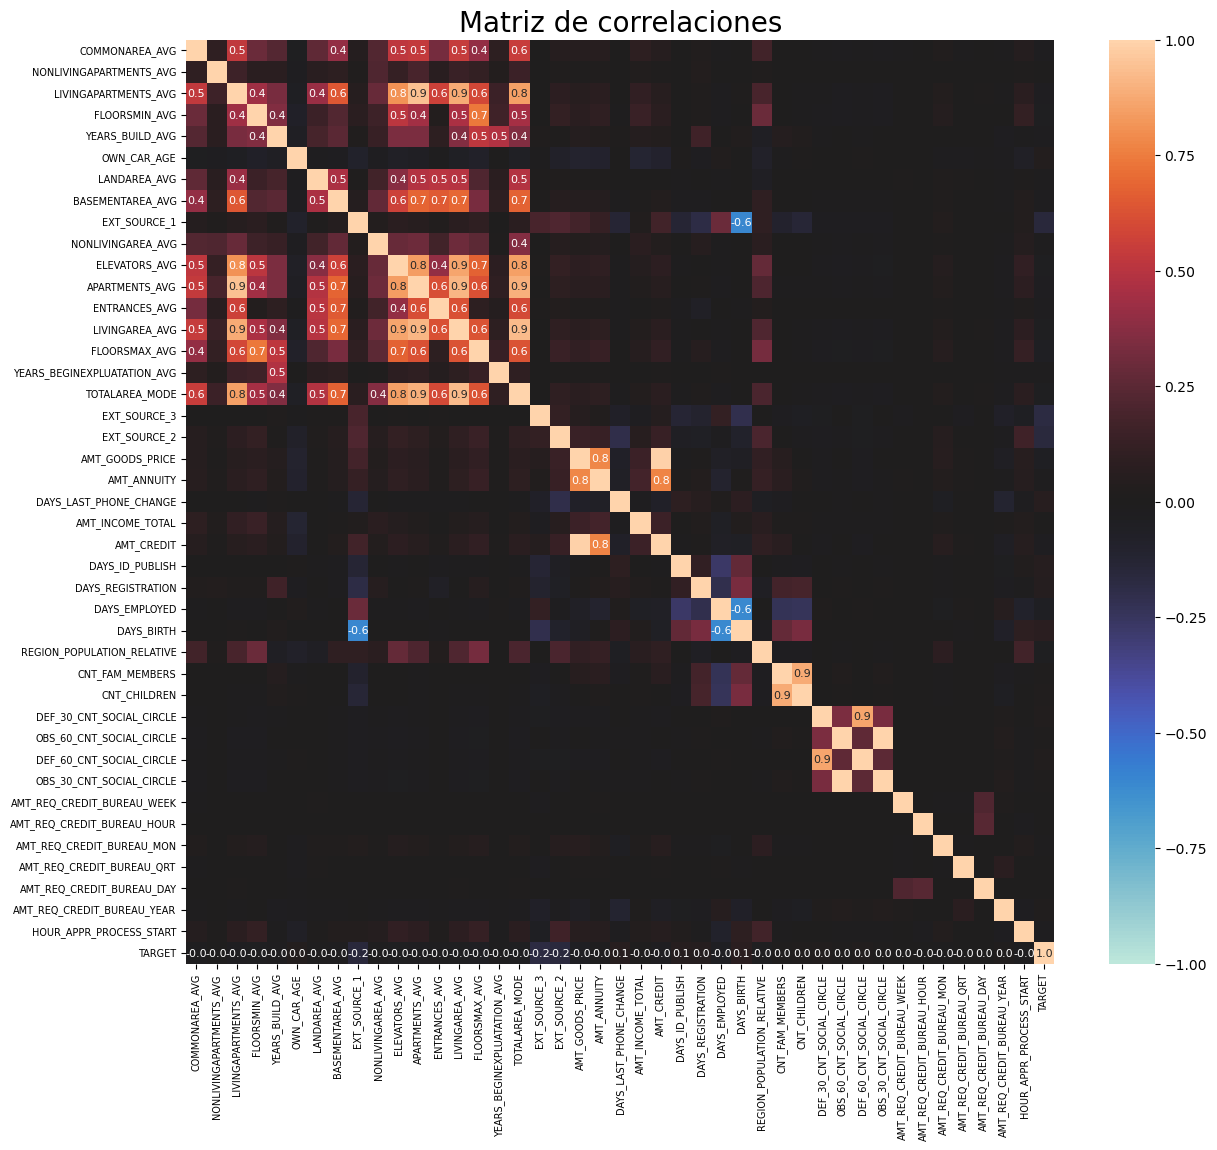

In [22]:
f.plot_correlation_heatmap(corr)

En algunos algoritmos, como los ensembling de árboles (xgboost, randomforest, lightgbm, catboost, ...) no es necesario eliminar colinealidad entre variables. En otros algoritmos como glm si es necesario eliminar la colinealidad, por lo que mostramos aquí una lista de las variables más colineales, en caso de que fuera necesario tenerla en cuenta.

In [23]:
corr = pd_data_train[pd_data_num].corr('pearson')
new_corr = corr.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1) # below main lower triangle of an array
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)
new_corr[new_corr['correlation']>0.6]

level_0                   level_1  correlation
1460  OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE     0.998516
985                 AMT_CREDIT           AMT_GOODS_PRICE     0.986965
464             APARTMENTS_AVG      LIVINGAPARTMENTS_AVG     0.943963
685             TOTALAREA_MODE            LIVINGAREA_AVG     0.925154
557             LIVINGAREA_AVG            APARTMENTS_AVG     0.913874
683             TOTALAREA_MODE            APARTMENTS_AVG     0.893720
548             LIVINGAREA_AVG      LIVINGAPARTMENTS_AVG     0.879194
1289              CNT_CHILDREN           CNT_FAM_MEMBERS     0.879056
556             LIVINGAREA_AVG             ELEVATORS_AVG     0.867172
1417  DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE     0.860355
674             TOTALAREA_MODE      LIVINGAPARTMENTS_AVG     0.848336
682             TOTALAREA_MODE             ELEVATORS_AVG     0.844945
472             APARTMENTS_AVG             ELEVATORS_AVG     0.836896
422              ELEVATORS_AVG      LIVINGAPARTMENTS_AVG     0.811352
859                AMT_ANNUITY           AMT_GOODS_PRICE     0.775592
986                 AMT_CREDIT               AMT_ANNUITY     0.770470
591              FLOORSMAX_AVG             FLOORSMIN_AVG     0.739743
553             LIVINGAREA_AVG          BASEMENTAREA_AVG     0.693061
469             APARTMENTS_AVG          BASEMENTAREA_AVG     0.679892
598              FLOORSMAX_AVG             ELEVATORS_AVG     0.679242
679             TOTALAREA_MODE          BASEMENTAREA_AVG     0.673985
511              ENTRANCES_AVG          BASEMENTAREA_AVG     0.653790
296           BASEMENTAREA_AVG      LIVINGAPARTMENTS_AVG     0.647632
686             TOTALAREA_MODE             FLOORSMAX_AVG     0.632131
601              FLOORSMAX_AVG            LIVINGAREA_AVG     0.630246
558             LIVINGAREA_AVG             ENTRANCES_AVG     0.620037
599              FLOORSMAX_AVG            APARTMENTS_AVG     0.618257
1160                DAYS_BIRTH             DAYS_EMPLOYED     0.616611
515              ENTRANCES_AVG            APARTMENTS_AVG     0.613986
1142                DAYS_BIRTH              EXT_SOURCE_1     0.601868

Convertimos los valores absolutos de la matriz de correlación en una lista de pares de variables, y filtramos las correlaciones mayores a 0.6 para identificar aquellas variables que podrían causar multicolinealidad.


En el análisis de correlación, identificamos varias variables con relaciones positivas muy fuertes, destacando su redundancia potencial. Por ejemplo, OBS_30_CNT_SOCIAL_CIRCLE y OBS_60_CNT_SOCIAL_CIRCLE tienen una correlación de 0.998, lo que indica que ambas miden prácticamente lo mismo sobre las conexiones sociales del cliente. Asimismo, AMT_CREDIT y AMT_GOODS_PRICE (0.987) reflejan que el monto del crédito solicitado está estrechamente vinculado al precio del bien adquirido. Por otro lado, variables relacionadas con propiedades, como APARTMENTS_AVG y LIVINGAPARTMENTS_AVG (0.944), o TOTALAREA_MODE y LIVINGAREA_AVG (0.925), describen características similares sobre las áreas habitables. Por último, CNT_CHILDREN y CNT_FAM_MEMBERS (0.879) resaltan cómo el número de hijos influye directamente en el tamaño de la familia.

### Tratamiento de valores nulos


Vamos a realizar un análisis descriptivo para identificar qué tan incompletos están los datos, tanto a nivel de columnas como de filas. Esto es crucial para decidir qué acciones tomar en el preprocesamiento, como eliminar filas o columnas con demasiados valores nulos o aplicar estrategias de imputación.

¿Son todos los nulos de una clase de la variable objetivo? o tienen el mismo porcentaje de la variable objetivo?

In [24]:
pd_series_null_columns = pd_data.isnull().sum().sort_values(ascending=False)
pd_series_null_rows = pd_data.isnull().sum(axis=1).sort_values(ascending=False)
print(pd_series_null_columns.shape, pd_series_null_rows.shape)

(93,) (307511,)


Vamos a generar dos series, una que resume los valores nulos por columna (pd_series_null_columns) y otra por fila (pd_series_null_rows).
Las columnas y filas se ordenaron de mayor a menor cantidad de valores faltantes, permitiendo visualizar rápidamente qué variables son más incompletas.

In [25]:
pd_null_columnas = pd.DataFrame(pd_series_null_columns, columns=['nulos_columnas'])     
pd_null_filas = pd.DataFrame(pd_series_null_rows, columns=['nulos_filas'])  
pd_null_filas['target'] = pd_data['TARGET'].copy()
pd_null_columnas['porcentaje_columnas'] = pd_null_columnas['nulos_columnas']/pd_data.shape[0]
pd_null_filas['porcentaje_filas']= pd_null_filas['nulos_filas']/pd_data.shape[1]

In [26]:
pd_null_columnas[pd_null_columnas['nulos_columnas'] > 0]

nulos_columnas  porcentaje_columnas
COMMONAREA_AVG                       214865             0.698723
NONLIVINGAPARTMENTS_AVG              213514             0.694330
FONDKAPREMONT_MODE                   210295             0.683862
LIVINGAPARTMENTS_AVG                 210199             0.683550
FLOORSMIN_AVG                        208642             0.678486
YEARS_BUILD_AVG                      204488             0.664978
OWN_CAR_AGE                          202929             0.659908
LANDAREA_AVG                         182590             0.593767
BASEMENTAREA_AVG                     179943             0.585160
EXT_SOURCE_1                         173378             0.563811
NONLIVINGAREA_AVG                    169682             0.551792
ELEVATORS_AVG                        163891             0.532960
WALLSMATERIAL_MODE                   156341             0.508408
APARTMENTS_AVG                       156061             0.507497
ENTRANCES_AVG                        154828             0.503488
LIVINGAREA_AVG                       154350             0.501933
HOUSETYPE_MODE                       154297             0.501761
FLOORSMAX_AVG                        153020             0.497608
YEARS_BEGINEXPLUATATION_AVG          150007             0.487810
TOTALAREA_MODE                       148431             0.482685
OCCUPATION_TYPE                       96391             0.313455
EXT_SOURCE_3                          60965             0.198253
ORGANIZATION_TYPE                     55374             0.180072
AMT_REQ_CREDIT_BUREAU_HOUR            41519             0.135016
AMT_REQ_CREDIT_BUREAU_DAY             41519             0.135016
AMT_REQ_CREDIT_BUREAU_WEEK            41519             0.135016
AMT_REQ_CREDIT_BUREAU_MON             41519             0.135016
AMT_REQ_CREDIT_BUREAU_QRT             41519             0.135016
AMT_REQ_CREDIT_BUREAU_YEAR            41519             0.135016
NAME_TYPE_SUITE                        1292             0.004201
OBS_60_CNT_SOCIAL_CIRCLE               1021             0.003320
OBS_30_CNT_SOCIAL_CIRCLE               1021             0.003320
DEF_30_CNT_SOCIAL_CIRCLE               1021             0.003320
DEF_60_CNT_SOCIAL_CIRCLE               1021             0.003320
EXT_SOURCE_2                            660             0.002146
AMT_GOODS_PRICE                         278             0.000904
AMT_ANNUITY                              12             0.000039
CODE_GENDER                               4             0.000013
CNT_FAM_MEMBERS                           2             0.000007
DAYS_LAST_PHONE_CHANGE                    1             0.000003

Vamos a ver la distribución de los nulos con respecto a la variable objetivo, para ver si nos está aportando información relevante o los podemos sustituir. En este caso no eliminamos las filas con valores nulos, porque una gran cantidad de filas los contienen.

In [27]:
f.get_percent_null_values_target(pd_data_train, pd_data_num, target='TARGET')

TARGET       0.0       1.0                     variable sum_null_values porcentaje_sum_null_values
TARGET       0.0       1.0                                                                        
0       0.914195  0.085805               COMMONAREA_AVG          171669                   0.697819
1       0.914040  0.085960      NONLIVINGAPARTMENTS_AVG          170615                   0.693534
2       0.913672  0.086328         LIVINGAPARTMENTS_AVG          167940                   0.682661
3       0.913639  0.086361                FLOORSMIN_AVG          166719                   0.677697
4       0.913240  0.086760              YEARS_BUILD_AVG          163417                   0.664275
5       0.915260  0.084740                  OWN_CAR_AGE          162520                   0.660629
6       0.911542  0.088458                 LANDAREA_AVG          145810                   0.592704
7       0.910606  0.089394             BASEMENTAREA_AVG          143679                   0.584042
8       0.914834  0.085166                 EXT_SOURCE_1          138647                   0.563587
9       0.909419  0.090581            NONLIVINGAREA_AVG          135581                   0.551124
10      0.908887  0.091113                ELEVATORS_AVG          130881                   0.532019
11      0.908144  0.091856               APARTMENTS_AVG          124597                   0.506475
12      0.907972  0.092028                ENTRANCES_AVG          123680                   0.502748
13      0.908218  0.091782               LIVINGAREA_AVG          123248                   0.500992
14      0.907850  0.092150                FLOORSMAX_AVG          122224                   0.496829
15      0.907652  0.092348  YEARS_BEGINEXPLUATATION_AVG          119808                   0.487009
16      0.907417  0.092583               TOTALAREA_MODE          118542                   0.481862
17      0.906160  0.093840                 EXT_SOURCE_3           48913                   0.198827
18      0.918095  0.081905                 EXT_SOURCE_2             525                   0.002134
19      0.922747  0.077253              AMT_GOODS_PRICE             233                   0.000947
20      1.000000       NaN                  AMT_ANNUITY              10                   0.000041
21      1.000000       NaN       DAYS_LAST_PHONE_CHANGE               1                   0.000004
22      1.000000       NaN              CNT_FAM_MEMBERS               2                   0.000008
23      0.968637  0.031363     DEF_30_CNT_SOCIAL_CIRCLE             829                   0.003370
24      0.968637  0.031363     OBS_60_CNT_SOCIAL_CIRCLE             829                   0.003370
25      0.968637  0.031363     DEF_60_CNT_SOCIAL_CIRCLE             829                   0.003370
26      0.968637  0.031363     OBS_30_CNT_SOCIAL_CIRCLE             829                   0.003370
27      0.895681  0.104319   AMT_REQ_CREDIT_BUREAU_WEEK           33340                   0.135524
28      0.895681  0.104319   AMT_REQ_CREDIT_BUREAU_HOUR           33340                   0.135524
29      0.895681  0.104319    AMT_REQ_CREDIT_BUREAU_MON           33340                   0.135524
30      0.895681  0.104319    AMT_REQ_CREDIT_BUREAU_QRT           33340                   0.135524
31      0.895681  0.104319    AMT_REQ_CREDIT_BUREAU_DAY           33340                   0.135524
32      0.895681  0.104319   AMT_REQ_CREDIT_BUREAU_YEAR           33340                   0.135524

Como los nulos en la mayoría de las variables se distribuyen de forma proporcional respecto a la variable objetivo (recordemos que era un 91.93% de ceros y un 8.07% de unos), y después de comprobar que la correlación se mantiene estable, hemos decidicido sustituir los valores missing por la mediana. Las únicas variables que se distribuyen de froma asimétrica son *AMT_ANNUITY*, *DAYS_LAST_PHONE_CHANGE* y *CNT_FAM_MEMBERS*, y como en comparación con el total de los datos son una cantidad insignificante de *NA*, tampoco afecta a la correlación con la variable target el hecho de sustituir por la mediana.

In [28]:
pd_data_train[pd_data_num] = pd_data_train[pd_data_num].apply(lambda x: x.fillna(x.median()))
pd_data_test[pd_data_num] = pd_data_test[pd_data_num].fillna(pd_data_train[pd_data_num].median())

Volvemos a aplicar la función para verificar que ya no hay valores nulos en las variables numéricas.

In [29]:
f.get_percent_null_values_target(pd_data_train, pd_data_num, target='TARGET')

No existen variables con valores nulos


Empty DataFrame
Columns: []
Index: []

Volvemos a visualizar la matriz de correlaciones para ver si se ha modificado tras la imputación de los valores nulos.

(<Figure size 1400x1200 with 2 Axes>,
 <Axes: title={'center': 'Matriz de correlaciones'}>)

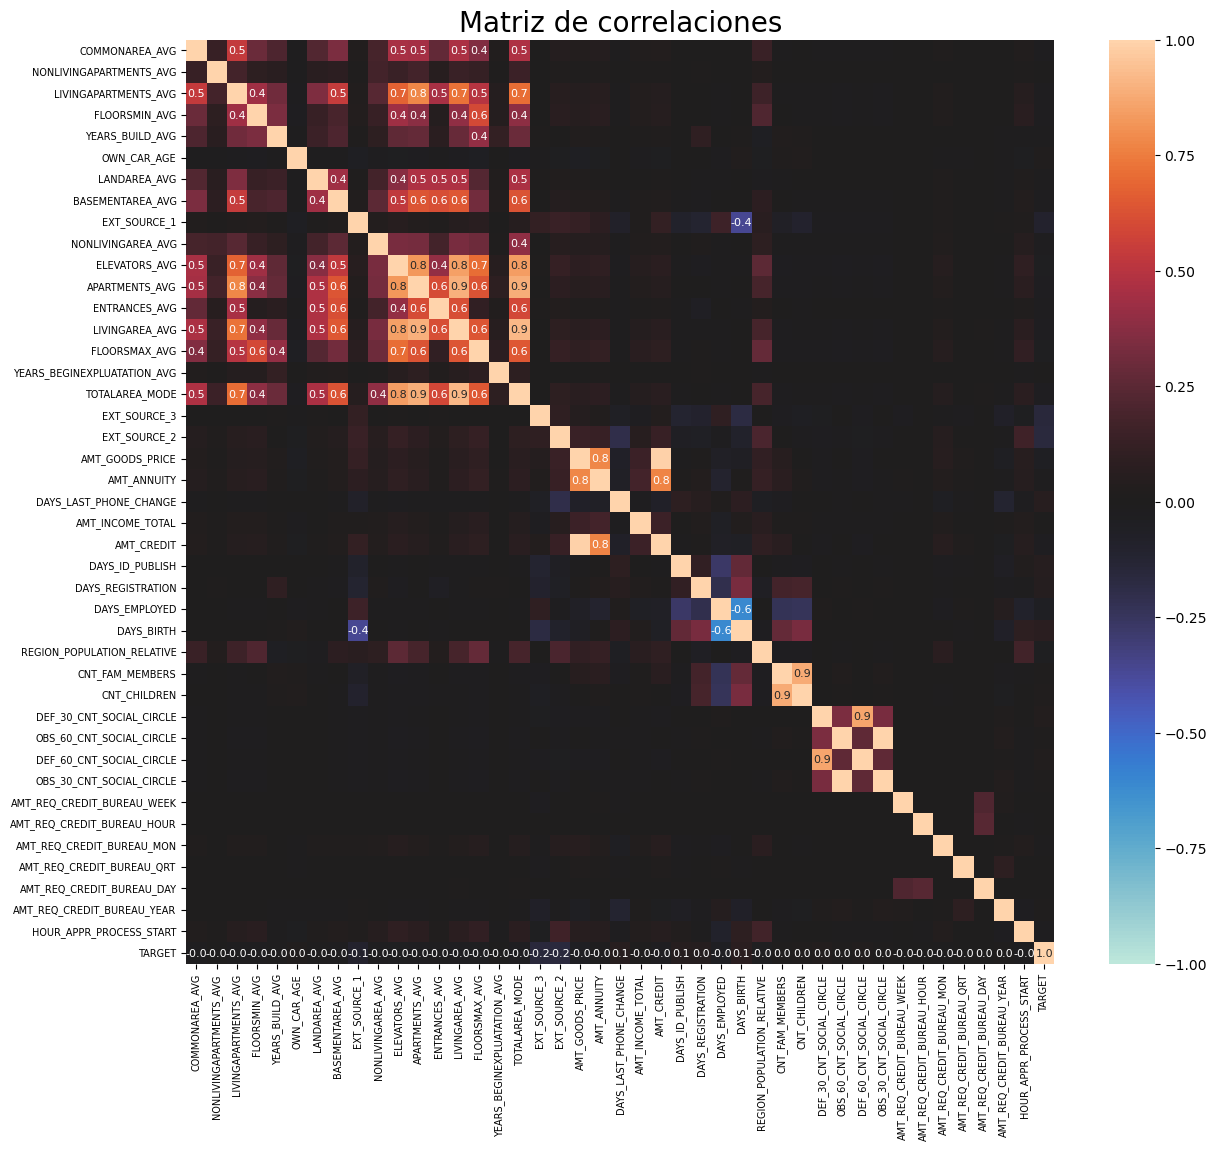

In [30]:
corr = pd.concat([pd_data_train[pd_data_num],pd_data_train['TARGET']], axis=1).corr(method='pearson')
f.plot_correlation_heatmap(corr)

In [31]:
corr.loc['TARGET'].sort_values(ascending=False)

TARGET                         1.000000
DAYS_BIRTH                     0.077406
DAYS_LAST_PHONE_CHANGE         0.055109
DAYS_ID_PUBLISH                0.051954
DAYS_REGISTRATION              0.043475
DEF_30_CNT_SOCIAL_CIRCLE       0.031356
DEF_60_CNT_SOCIAL_CIRCLE       0.030611
CNT_CHILDREN                   0.019716
OWN_CAR_AGE                    0.016371
AMT_REQ_CREDIT_BUREAU_YEAR     0.009758
CNT_FAM_MEMBERS                0.009688
OBS_30_CNT_SOCIAL_CIRCLE       0.008783
OBS_60_CNT_SOCIAL_CIRCLE       0.008697
AMT_REQ_CREDIT_BUREAU_DAY      0.002466
AMT_REQ_CREDIT_BUREAU_WEEK    -0.000659
AMT_REQ_CREDIT_BUREAU_HOUR    -0.001306
AMT_INCOME_TOTAL              -0.002190
YEARS_BEGINEXPLUATATION_AVG   -0.004636
AMT_REQ_CREDIT_BUREAU_QRT     -0.006440
NONLIVINGAPARTMENTS_AVG       -0.006499
YEARS_BUILD_AVG               -0.010426
LANDAREA_AVG                  -0.012367
AMT_ANNUITY                   -0.012433
AMT_REQ_CREDIT_BUREAU_MON     -0.014678
ENTRANCES_AVG                 -0.015639


Las correlaciones encontradas son en su mayoría débiles, lo que sugiere que ninguna variable tiene un impacto muy fuerte sobre la variable objetivo por sí sola. Sin embargo, combinaciones de estas variables podrían proporcionar información más útil en modelos predictivos.

## Tratamiento de las variables categoricas

Vamos a convertir las variables categoricas en numericas para después obtener la correlación gracias a la correlación de spearman y el coeficiente V-Cramer.

Se han procesado las variables booleanas y categóricas para calcular su correlación con la variable objetivo TARGET.

In [32]:
pd_data_train[pd_data_bool].head()

EMERGENCYSTATE_MODE CODE_GENDER  FLAG_DOCUMENT_10  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_11  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  FLAG_OWN_REALTY  FLAG_OWN_CAR  FLAG_DOCUMENT_12  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  FLAG_EMAIL  FLAG_PHONE  FLAG_CONT_MOBILE  FLAG_WORK_PHONE  FLAG_EMP_PHONE  FLAG_MOBIL  TARGET
SK_ID_CURR                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
172963                        0           0                 0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                1             1                 0                           0                           0                            0                       0                       0                        0           0           1                 1                0               0           1       0
423589                        0           0                 0                0                0                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                1             1                 0                           0                           0                            0                       0                       0                        0           0           1                 1                1               1           1       0
392520                        0           0                 0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                1             1                 0                           0                           0                            0                       1                       0                        0           1           0                 1                0               0           1       0
359127                        0           1                 0                0                0                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                1             0                 0                           0                           0                            0                       0                       0                        0           0           0    

In [33]:
corr_bool = pd_data_train[pd_data_bool].corr(method='pearson')
f.plot_correlation_heatmap(corr_bool)

(<Figure size 1400x1200 with 2 Axes>,
 <Axes: title={'center': 'Matriz de correlaciones'}>)

La matriz de correlación muestra correlaciones altas entre variables como REG_CITY_NOT_WORK_CITY y LIVE_CITY_NOT_WORK_CITY (0.9), lo que sugiere redundancia, ya que ambas representan relaciones similares entre residencia y trabajo. Sin embargo, las correlaciones con la variable objetivo (TARGET) son bajas.

Otro dato interesante que podemos extraer de la gráfica, aunque no necesariamente relevante respecto a la variable target, es que FLAG_DOCUMENT_6 presenta una correlación negativa significativa (-0.6) con FLAG_EMP_PHONE, por lo que probablemente este documento contenga datos personales del cliente, entre ellos su número de teléfono.

Tambien hemos procesado las variables categóricas (no booleanas), transformadas en formato numérico para calcular sus correlaciones, utilizando una función que itera la función *cramers_v* de los apuntes.

In [34]:
corr_cats = f.corr_cat(df=pd_data_train,target='TARGET',target_transform=True)
corr_cats

WALLSMATERIAL_MODE  HOUSETYPE_MODE  OCCUPATION_TYPE  ORGANIZATION_TYPE  NAME_TYPE_SUITE  CODE_GENDER  REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  NAME_INCOME_TYPE  REGION_RATING_CLIENT  NAME_HOUSING_TYPE  NAME_FAMILY_STATUS  NAME_EDUCATION_TYPE    TARGET
WALLSMATERIAL_MODE                     1.000000        0.106949         0.026653           0.030347         0.008646     0.015555                     0.098011                    0.003890          0.024058              0.105330           0.035866            0.008624             0.036321  0.027575
HOUSETYPE_MODE                         0.106949        1.000000         0.022958           0.021435         0.000000     0.007973                     0.019517                    0.000000          0.016142              0.025076           0.016962            0.010240             0.016470  0.011329
OCCUPATION_TYPE                        0.026653        0.022958         1.000000           0.301776         0.020917     0.572457                     0.057319                    0.019195          0.144951              0.057187           0.032623            0.058650             0.219109  0.080576
ORGANIZATION_TYPE                      0.030347        0.021435         0.301776           1.000000         0.018956     0.323213                     0.093888                    0.019775          0.203516              0.094917           0.067417            0.049357             0.116218  0.056873
NAME_TYPE_SUITE                        0.008646        0.000000         0.020917           0.018956         1.000000     0.063592                     0.024091                    0.016191          0.021888              0.024646           0.018756            0.067369             0.022795  0.009530
CODE_GENDER                            0.015555        0.007973         0.572457           0.323213         0.063592     0.999991                     0.020063                    0.006377          0.170464              0.019900           0.066897            0.167912             0.026127  0.055378
REGION_RATING_CLIENT_W_CITY            0.098011        0.019517         0.057319           0.093888         0.024091     0.020063                     1.000000                    0.017709          0.130031              0.956621           0.086834            0.023566             0.071797  0.060857
WEEKDAY_APPR_PROCESS_START             0.003890        0.000000         0.019195           0.019775         0.016191     0.006377                     0.017709                    1.000000          0.013009              0.018754           0.004755            0.003939             0.005417  0.004307
NAME_INCOME_TYPE                       0.024058        0.016142         0.144951           0.203516         0.021888     0.170464                     0.130031                    0.013009          1.000000              0.136369           0.054748            0.113153             0.104543  0.062831
REGION_RATING_CLIENT                   0.105330        0.025076         0.057187           0.094917         0.024646     0.019900                     0.956621                    0.018754          0.136369              1.000000           0.087524            0.022782             0.071932  0.059122
NAME_HOUSING_TYPE                      0.035866        0.016962         0.032623           0.067417         0.018756     0.066897                     0.086834                    0.004755          0.054748              0.087524           1.000000            0.067920             0.041843  0.036127
NAME_FAMILY_STATUS                     0.008624        0.010240         0.058650           0.049357         0.067369     0.167912                     0.023566                    0.003939          0.113153              0.022782           0.067920            1.000000             0.052976  0.039689
NAME_EDUCATION_TYPE                    0.036321        0.016470         0.219109           0.116218         0.022795     0.026127                     0.071797          

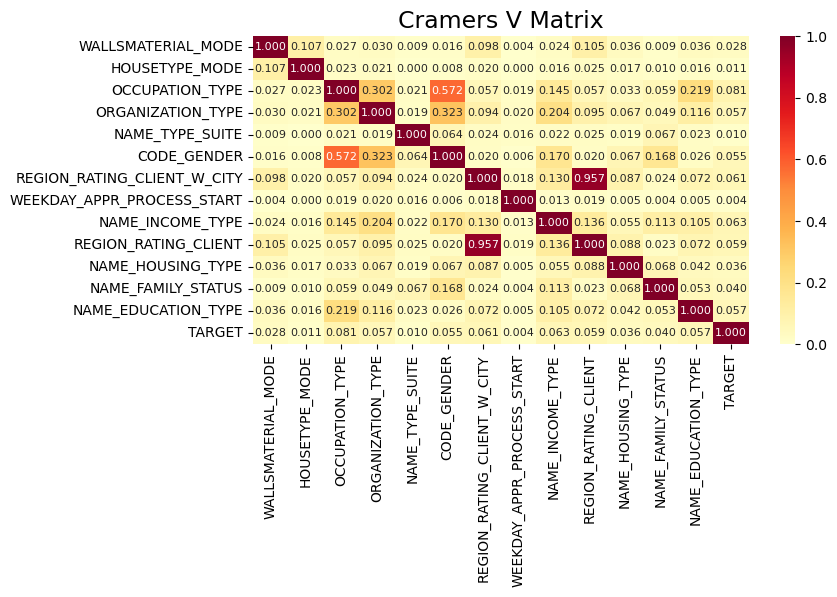

In [35]:
plt.figure(figsize=(8,4))
sns.heatmap(corr_cats, annot=True, fmt='.3f', cmap='YlOrRd', annot_kws={"size": 8})
plt.title('Cramers V Matrix', fontdict={'size':'17'})
plt.show()

Esta matriz de Cramér's V revela información interesante sobre las relaciones entre las variables categóricas y la variable objetivo TARGET en el dataset.

Se destacan correlaciones moderadas entre algunas variables, como CODE_GENDER y ORGANIZATION_TYPE (0.572) o REGION_RATING_CLIENT y REGION_RATING_CLIENT_W_CITY (0.957). Estas correlaciones sugieren que algunas variables comparten información o describen aspectos relacionados de los clientes, como su género o calificaciones asociadas a la región de residencia. Esto indica relaciones lógicas predecibles entre las variables.

Las correlaciones con la variable TARGET son en general bajas (menores a 0.1), lo que implica que estas variables categóricas, aunque relevantes, no tienen un impacto directo o individual significativo en el modelo. 

### Tratamiento de valores nulos
En las variables categóricas, los valores nulos se suelen sustituir por una nueva clase: "sin valor" o por la moda

In [36]:
pd_data_train[pd_data_bool].isna().sum()

EMERGENCYSTATE_MODE            0
CODE_GENDER                    4
FLAG_DOCUMENT_10               0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_5                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_7                0
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_9                0
FLAG_DOCUMENT_11               0
FLAG_DOCUMENT_13               0
FLAG_DOCUMENT_14               0
FLAG_DOCUMENT_15               0
FLAG_DOCUMENT_16               0
FLAG_DOCUMENT_17               0
FLAG_DOCUMENT_18               0
FLAG_DOCUMENT_19               0
FLAG_DOCUMENT_20               0
FLAG_DOCUMENT_21               0
FLAG_OWN_REALTY                0
FLAG_OWN_CAR                   0
FLAG_DOCUMENT_12               0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
FLAG_EMAIL

In [37]:
missing_gender = pd_data_train[pd_data_train['CODE_GENDER'].isnull()]
target_dist = missing_gender['TARGET']
print("Target distribution for missing code_gender:")
print(target_dist)

Target distribution for missing code_gender:
SK_ID_CURR
144669    0
319880    0
141289    0
196708    0
Name: TARGET, dtype: int64


In [38]:
pd_data_train['CODE_GENDER'] = pd_data_train['CODE_GENDER'].astype('category').cat.add_categories('-1').fillna('-1')

Podemos observar que las variables booleanas, en general, no presentan valores nulos, con la excepción de la variable CODE_GENDER, que tiene únicamente 4 valores faltantes. Dado que este número es pequeño, se ha decidido eliminar las cuatro filas que contienen esos valores, ya que representan un porcetaje insignificante del total de filas, y ninguno tiene valor 1 en la variable objetivo. Esto nos permite seguir considerando la variable como boolena, y ahorrarnos una nueva categoría que sólo se presentaría 4 veces.

En las variables categóricas generales, se observan varias columnas con cantidades considerables de valores nulos:

In [39]:
pd_data_train[pd_data_cat].isna().sum()

FONDKAPREMONT_MODE             168050
WALLSMATERIAL_MODE             124875
HOUSETYPE_MODE                 123196
OCCUPATION_TYPE                 77126
ORGANIZATION_TYPE               44460
NAME_TYPE_SUITE                  1050
REGION_RATING_CLIENT_W_CITY         0
WEEKDAY_APPR_PROCESS_START          0
NAME_INCOME_TYPE                    0
REGION_RATING_CLIENT                0
NAME_HOUSING_TYPE                   0
NAME_FAMILY_STATUS                  0
NAME_EDUCATION_TYPE                 0
NAME_CONTRACT_TYPE                  0
dtype: int64

In [40]:
for col in pd_data_cat:
        pd_data_train[col] = pd_data_train[col].astype('category').cat.add_categories('Sin valor').fillna('Sin valor')

En las variables categóricas generales se encuentran variables con cantidades significativas de valores nulos, como:
*FONDKAPREMONT_MODE* (168,050 valores nulos), *WALLSMATERIAL_MODE* (124,875 valores nulos), *HOUSETYPE_MODE* (123,196 valores nulos). Otras variables como *NAME_TYPE_SUITE* presentan menos valores nulos (1,050). Optamos por cambiarlos a una nueva categoría *Sin valor*, ya que al ser tantos, sustituirlos por la moda podría afectar al funcinamiento del modelo.

## Exportación parcial del DataSet dividido en Train y Test

Para acabar el notebook 02, procedemos a exportar a dos archivos CSV (test_pd_data_preprocessing_missing_outliers.csv y train_pd_data_preprocessing_missing_outliers.csv) el contenido del dataset ya dividido en Train y Test.

In [41]:
pd_data_train.to_csv("../data/train_pd_data_preprocessing_missing_outlier.csv")
pd_data_test.to_csv("../data/test_pd_data_preprocessing_missing_outlier.csv")